## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
from scipy.stats import skew
%matplotlib inline

### Eksplorasi Awal Dataset

In [2]:
# Pilih Bank: BCA/BRI/MRI/BNI/BTN

bank = 'BCA'
bank_dataset = 'B' + bank + '.csv'
print(bank_dataset)

BBCA.csv


In [3]:
df = pd.read_csv(bank_dataset, usecols=['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2016,"2,635.000","2,685.000","2,630.000","2,645.000","2,438.056",77.480
1,1/5/2016,"2,640.000","2,710.000","2,640.000","2,675.000","2,465.709",96.609
2,1/6/2016,"2,665.000","2,700.000","2,640.000","2,640.000","2,433.448",105.370
3,1/7/2016,"2,620.000","2,630.000","2,600.000","2,600.000","2,396.577",146.747
4,1/8/2016,"2,590.000","2,620.000","2,590.000","2,600.000","2,396.577",125.820
...,...,...,...,...,...,...,...
1375,6/23/2021,"6,295.000","6,340.000","6,230.000","6,230.000","6,230.000",52.451
1376,6/24/2021,"6,310.000","6,310.000","6,200.000","6,210.000","6,210.000",56.010
1377,6/25/2021,"6,230.000","6,260.000","6,190.000","6,190.000","6,190.000",68.940
1378,6/28/2021,"6,100.000","6,150.000","6,055.000","6,055.000","6,055.000",84.421


### Memunculkan Missing Values pada Dataset

In [4]:
startdate = df['Date'].iloc[0]
enddate = df['Date'].iloc[-1]

start = datetime.datetime.strptime(startdate, "%m/%d/%Y")
end = datetime.datetime.strptime(enddate, "%m/%d/%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

dates = []
for date in date_generated:
    readable_date = date.strftime("%m/%d/%Y")
    dates.append(readable_date)
    
df_dates = pd.DataFrame(dates)
df_dates[0] = pd.to_datetime(df_dates[0])
df_dates.columns = ['Date']

In [5]:
df_copy = df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [6]:
df = pd.merge(df_dates, df_copy, how='left')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2004 non-null   datetime64[ns]
 1   Open       1380 non-null   object        
 2   High       1380 non-null   object        
 3   Low        1380 non-null   object        
 4   Close      1380 non-null   object        
 5   Adj Close  1380 non-null   object        
 6   Volume     1380 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 125.2+ KB


#### Menyeragamkan Format Penulisan Data

In [8]:
df['Open'] = df['Open'].str.slice(0, -4, 1)
df['Open'] = df['Open'].str.replace(r',', '')
df['Open'] = pd.to_numeric(df['Open'])

df['High'] = df['High'].str.slice(0, -4, 1)
df['High'] = df['High'].str.replace(r',', '')
df['High'] = pd.to_numeric(df['High'])

df['Low'] = df['Low'].str.slice(0, -4, 1)
df['Low'] = df['Low'].str.replace(r',', '')
df['Low'] = pd.to_numeric(df['Low'])

df['Close'] = df['Close'].str.slice(0, -4, 1)
df['Close'] = df['Close'].str.replace(r',', '')
df['Close'] = pd.to_numeric(df['Close'])

df['Adj Close'] = df['Adj Close'].str.replace(r',', '')
df['Adj Close'] = pd.to_numeric(df['Adj Close'])

df['Volume'] = df['Volume'].str.replace(r'.', '')
df['Volume'] = df['Volume'].str.replace(r',', '')
df['Volume'] = pd.to_numeric(df['Volume'])

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2004 non-null   datetime64[ns]
 1   Open       1380 non-null   float64       
 2   High       1380 non-null   float64       
 3   Low        1380 non-null   float64       
 4   Close      1380 non-null   float64       
 5   Adj Close  1380 non-null   float64       
 6   Volume     1380 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 125.2 KB


In [10]:
df.describe().T  # Statistik dasar

,count,mean,std,min,25%,50%,75%,max
Open,1380.0,4785.485507,1359.082899,2530.000,3550.00000,4780.000,6010.00000,7345.000
High,1380.0,4826.938406,1369.804163,2565.000,3590.00000,4830.000,6055.00000,7380.000
Low,1380.0,4737.797101,1339.713964,2525.000,3520.00000,4740.000,5981.25000,7160.000
Close,1380.0,4781.985507,1353.829181,2550.000,3558.75000,4782.500,6011.25000,7345.000
Adj Close,1380.0,4590.121512,1380.226734,2350.489,3348.27775,4553.398,5801.83225,7243.463
Volume,1380.0,82453.899275,57624.808705,0.000,52679.75000,73069.500,100522.50000,1062862.000


In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2635.0,2685.0,2630.0,2645.0,2438.056,77480.0
1,2016-01-05,2640.0,2710.0,2640.0,2675.0,2465.709,96609.0
2,2016-01-06,2665.0,2700.0,2640.0,2640.0,2433.448,105370.0
3,2016-01-07,2620.0,2630.0,2600.0,2600.0,2396.577,146747.0
4,2016-01-08,2590.0,2620.0,2590.0,2600.0,2396.577,125820.0
...,...,...,...,...,...,...,...
1999,2021-06-25,6230.0,6260.0,6190.0,6190.0,6190.000,68940.0
2000,2021-06-26,NaN,NaN,NaN,NaN,NaN,NaN
2001,2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN
2002,2021-06-28,6100.0,6150.0,6055.0,6055.0,6055.000,84421.0


### Analisis Univariat Awal

Analisis berikut ini merupakan analisis univariat sederhana setiap variabel inti analisis. Perlu
diperhatikan bahwa seluruh analisis pada bagian ini belum mempertimbangkan karakteristik
sekuensial time series yang sebenarnya dimiliki oleh seluruh variabel yang dianalisis.

### 1) Open

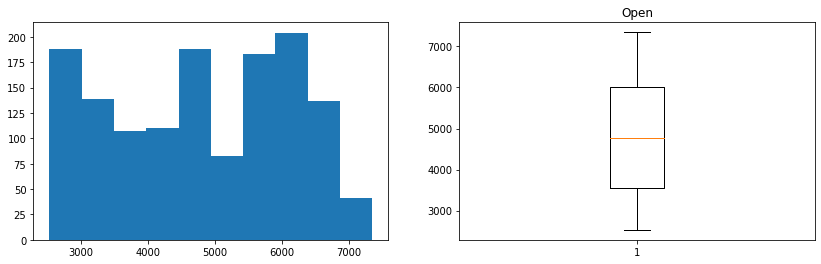

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.hist(df['Open'][~np.isnan(df['Open'])], density=False)
ax2.boxplot(df['Open'][~np.isnan(df['Open'])])
plt.show()

In [13]:
df['Open'].skew()  # Semakin mendekati 0, maka akan semakin mendekati distribusi normal

-0.13415222758140757

### 2) High

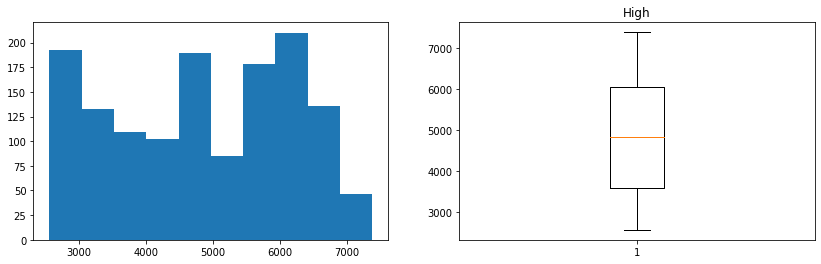

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.hist(df['High'][~np.isnan(df['High'])], density=False)
ax2.boxplot(df['High'][~np.isnan(df['High'])])
plt.show()

In [15]:
df['High'].skew()

-0.14406189201168676

### 3) Low

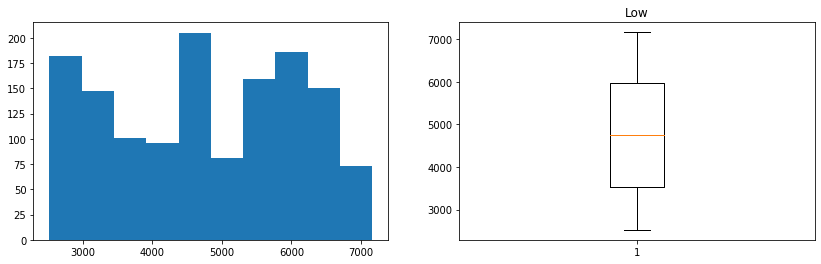

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.hist(df['Low'][~np.isnan(df['Low'])], density=False)
ax2.boxplot(df['Low'][~np.isnan(df['Low'])])
plt.show()

In [17]:
df['Low'].skew()

-0.13572268121598283

### 4) Volume

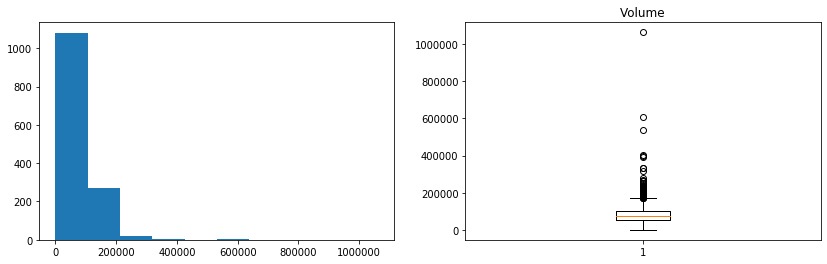

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.hist(df['Volume'][~np.isnan(df['Volume'])], density=False)
ax2.boxplot(df['Volume'][~np.isnan(df['Volume'])])
plt.show()

In [19]:
df['Volume'].skew()

5.386927016298188

### 5) Adj Close

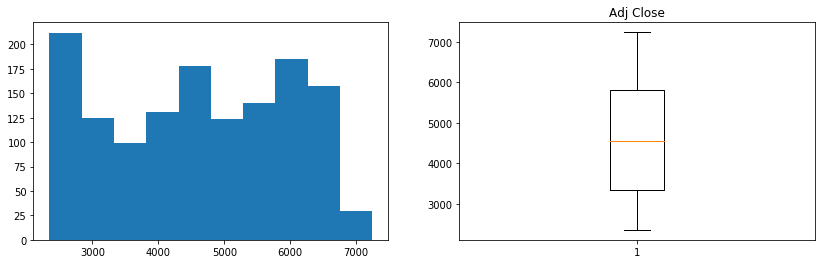

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.hist(df['Adj Close'][~np.isnan(df['Adj Close'])], density=False)
ax2.boxplot(df['Adj Close'][~np.isnan(df['Adj Close'])])
plt.show()

In [21]:
df['Adj Close'].skew()

-0.0965538200334947

### 6) Close

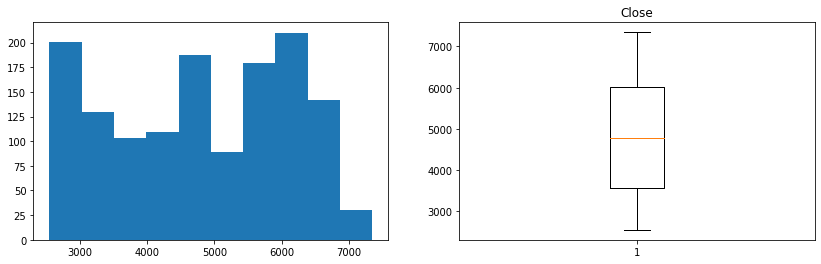

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.hist(df['Close'][~np.isnan(df['Close'])], density=False)
ax2.boxplot(df['Close'][~np.isnan(df['Close'])])
plt.show()

In [23]:
df['Close'].skew()

-0.1436356699777365

### Analisis Multivariat

Pada analisis multivariat, akan dilihat hubungan kovarians dan korelasi antar variabel. Kovarians yang bernilai positif antara variabel A dan B bermakna bahwa nilai A dan B berbanding lurus (Semakin besar nilai A, maka semakin besar pula nilai B). Sebaliknya, nilai kovarians yang negatif bermakna bahwa nilai A dan B berbanding terbalik. 

Sementara itu, nilai korelasi menunjukkan tingkat "kekuatan" hubungan yang diperoleh. Nilai korelasi yang mendekati 0 bermakna bahwa hubungan antara A dan B yang diperoleh (baik itu berbanding lurus ataupun terbalik) tidak signifikan/sangat lemah.

#### Kovarians

In [24]:
df.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,1.847106e+06,1.859944e+06,1.819436e+06,1.837510e+06,1.872037e+06,-3.326820e+06
High,1.859944e+06,1.876363e+06,1.832540e+06,1.852885e+06,1.887941e+06,-2.281322e+06
Low,1.819436e+06,1.832540e+06,1.794834e+06,1.812409e+06,1.845821e+06,-4.193365e+06
Close,1.837510e+06,1.852885e+06,1.812409e+06,1.832853e+06,1.866966e+06,-3.431387e+06
Adj Close,1.872037e+06,1.887941e+06,1.845821e+06,1.866966e+06,1.905026e+06,-2.826456e+06
Volume,-3.326820e+06,-2.281322e+06,-4.193365e+06,-3.431387e+06,-2.826456e+06,3.320619e+09


#### Korelasi

In [25]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999069,0.999261,0.998665,0.997971,-0.042479
High,0.999069,1.000000,0.998580,0.999139,0.998572,-0.028901
Low,0.999261,0.998580,1.000000,0.999264,0.998222,-0.054318
Close,0.998665,0.999139,0.999264,1.000000,0.999130,-0.043984
Adj Close,0.997971,0.998572,0.998222,0.999130,1.000000,-0.035537
Volume,-0.042479,-0.028901,-0.054318,-0.043984,-0.035537,1.000000


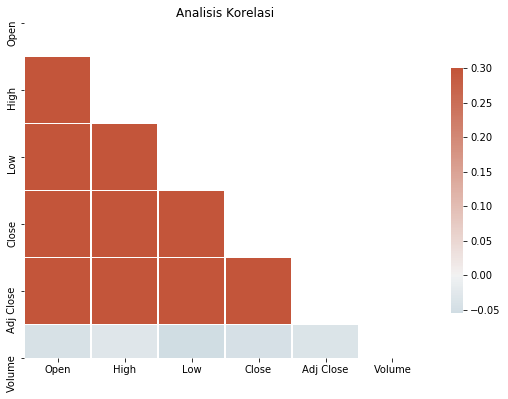

In [26]:
# Heatmap Visualization

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle

fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.title('Analisis Korelasi')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Hasil analisis multivariat menunjukkan bahwa variabel Volume tidak memiliki hubungan yang signifikan dengan variabel target (Close). Dengan kata lain, dapat disimpulkan bahwa nilai indeks saham tidak dipengaruhi secara signifikan oleh Volume.

Selain itu, diperoleh informasi bahwa terdapat hubungan yang kuat antara seluruh variabel independen selain Volume. Ini menunjukkan adanya multikolinearitas pada dataset yang digunakan, di mana terdapat korelasi antar variabel independen yang digunakan untuk memprediksi variabel target (Close). Dengan demikian, dapat dipertimbangkan untuk melakukan feature selection terlebih dahulu pada analisis lebih lanjut.

### Data Preprocessing

### Null Values Handling

In [27]:
df.isnull().sum()

Date           0
Open         624
High         624
Low          624
Close        624
Adj Close    624
Volume       624
dtype: int64

#### Mengisi null values

In [28]:
df = df.interpolate(method='linear')  # Melakukan interpolasi pada missing/null values
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2635.000000,2685.000000,2630.0,2645.0,2438.056,77480.000000
1,2016-01-05,2640.000000,2710.000000,2640.0,2675.0,2465.709,96609.000000
2,2016-01-06,2665.000000,2700.000000,2640.0,2640.0,2433.448,105370.000000
3,2016-01-07,2620.000000,2630.000000,2600.0,2600.0,2396.577,146747.000000
4,2016-01-08,2590.000000,2620.000000,2590.0,2600.0,2396.577,125820.000000
...,...,...,...,...,...,...,...
1999,2021-06-25,6230.000000,6260.000000,6190.0,6190.0,6190.000,68940.000000
2000,2021-06-26,6186.666667,6223.333333,6145.0,6145.0,6145.000,74100.333333
2001,2021-06-27,6143.333333,6186.666667,6100.0,6100.0,6100.000,79260.666667
2002,2021-06-28,6100.000000,6150.000000,6055.0,6055.0,6055.000,84421.000000


In [29]:
df.isnull().sum()  # Cek null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Outliers Handling

### Data Transformation

Pada bagian ini, dilakukan transformasi setiap variabel agar menjadi lebih berdistribusi normal dan sesuai dengan kebutuhan mayoritas model, sekaligus untuk menangani outliers secara tidak langsung. Namun, perlu diperhatikan bahwa penanganan outliers dengan teknik ini masih belum mempertimbangkan karakteristik sekuensial time-series yang sebenarnya dimiliki oleh data.

### 1) Open

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


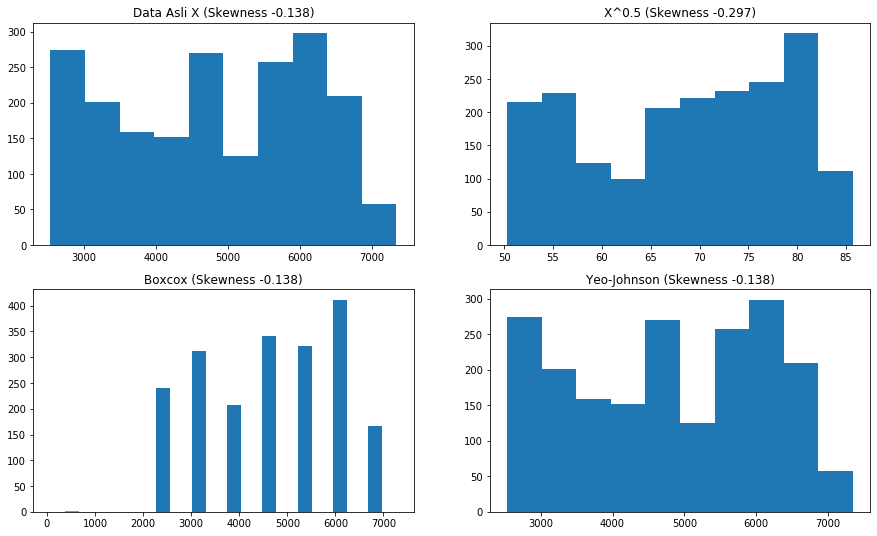

In [30]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Open']).skew()
ax[0,0].hist(df['Open'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Open']**0.5).skew()
ax[0,1].hist(df['Open']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Open'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Open']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_open, lambda_data = yeojohnson(df['Open'])
skew_yeo = skew(trans_data_open)
ax[1,1].hist(trans_data_open, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

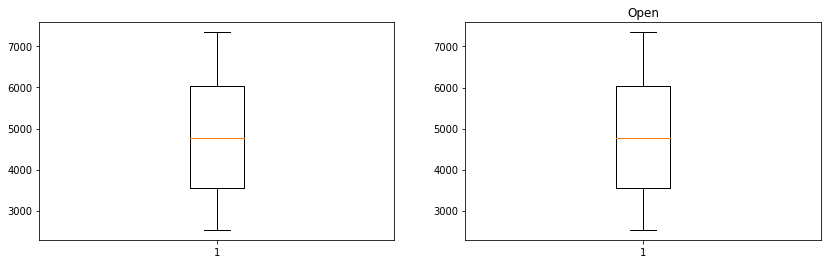

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.boxplot(df['Open'])
ax2.boxplot(trans_data_open)
plt.show()

### 2) High

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


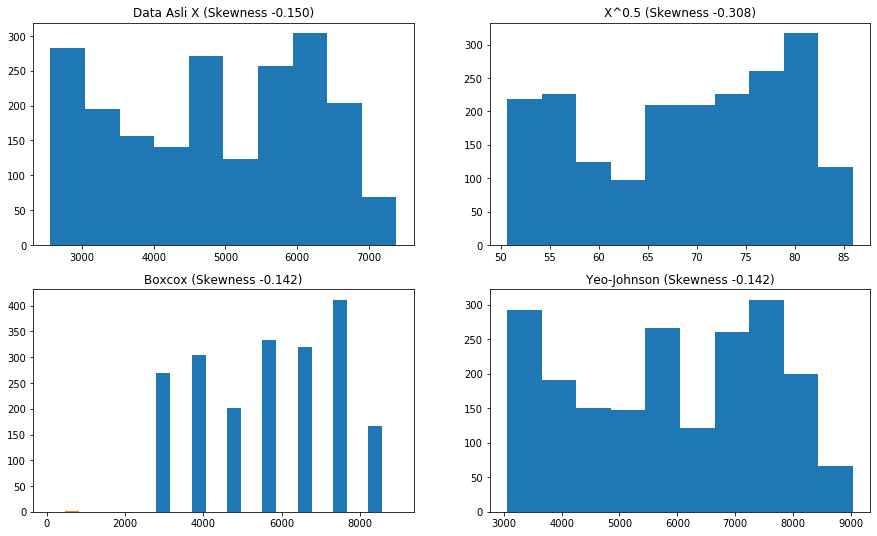

In [32]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['High']).skew()
ax[0,0].hist(df['High'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['High']**0.5).skew()
ax[0,1].hist(df['High']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['High'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['High']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_high, lambda_data = yeojohnson(df['High'])
skew_yeo = skew(trans_data_high)
ax[1,1].hist(trans_data_high, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

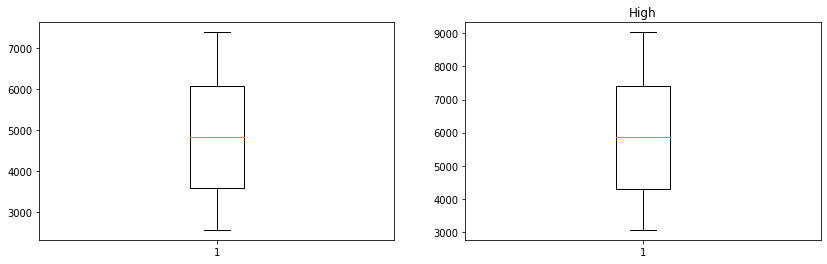

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.boxplot(df['High'])
ax2.boxplot(trans_data_high)
plt.show()

### 3) Low

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


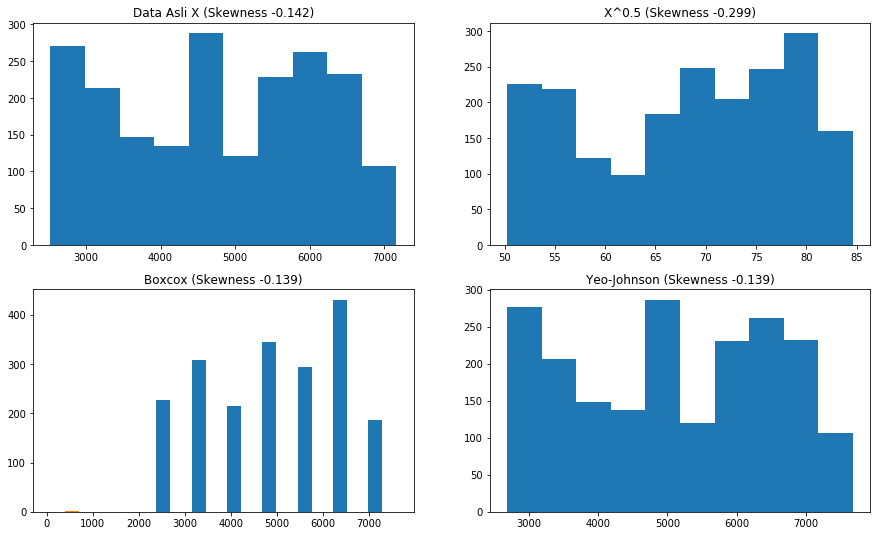

In [34]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Low']).skew()
ax[0,0].hist(df['Low'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Low']**0.5).skew()
ax[0,1].hist(df['Low']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Low'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Low']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_low, lambda_data = yeojohnson(df['Low'])
skew_yeo = skew(trans_data_low)
ax[1,1].hist(trans_data_low, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

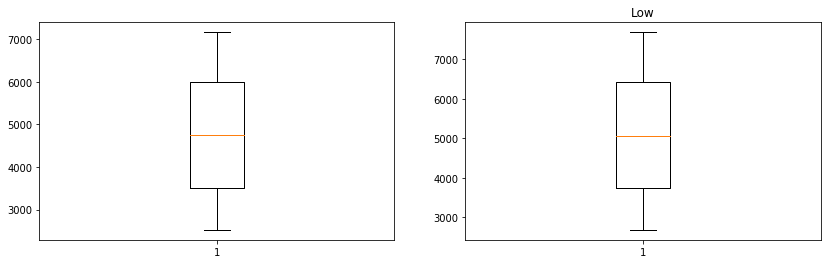

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.boxplot(df['Low'])
ax2.boxplot(trans_data_low)
plt.show()

### 4) Volume

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


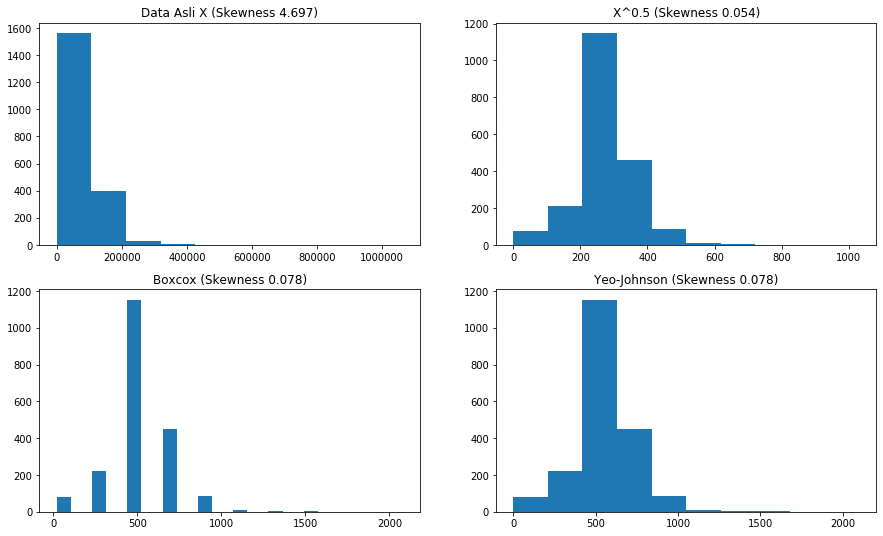

In [36]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Volume']).skew()
ax[0,0].hist(df['Volume'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Volume']**0.5).skew()
ax[0,1].hist(df['Volume']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')

skew_c = pd.DataFrame(boxcox(df['Volume']+1)[0]).skew()[0]
ax[1,0].hist(boxcox(df['Volume']+1), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_volume, lambda_data = yeojohnson(df['Volume'])
skew_yeo = skew(trans_data_volume)
ax[1,1].hist(trans_data_volume, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

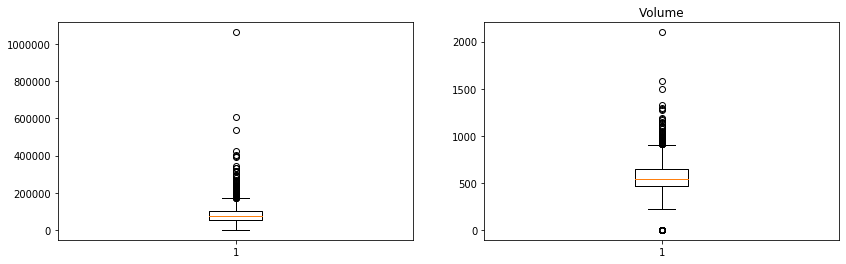

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.boxplot(df['Volume'])
ax2.boxplot(trans_data_volume)
plt.show()

### 5) Adj Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


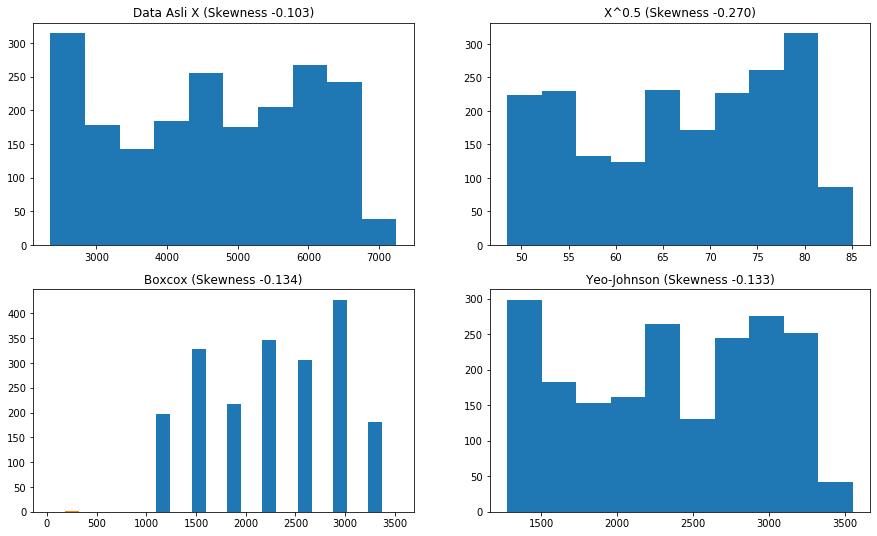

In [38]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Adj Close']).skew()
ax[0,0].hist(df['Adj Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Adj Close']**0.5).skew()
ax[0,1].hist(df['Adj Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Adj Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Adj Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_adj, lambda_data = yeojohnson(df['Adj Close'])
skew_yeo = skew(trans_data_adj)
ax[1,1].hist(trans_data_adj, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

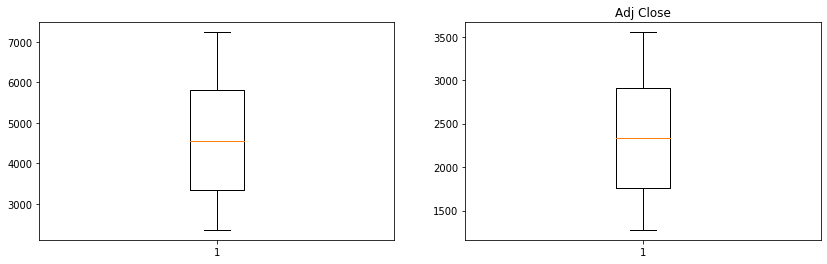

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.boxplot(df['Adj Close'])
ax2.boxplot(trans_data_adj)
plt.show()

### 6) Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


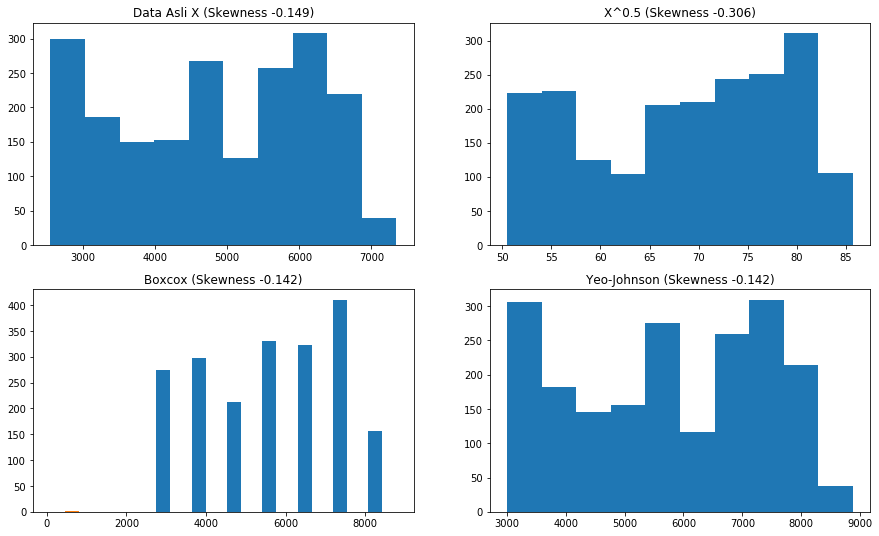

In [40]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Close']).skew()
ax[0,0].hist(df['Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Close']**0.5).skew()
ax[0,1].hist(df['Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_close, lambda_data = yeojohnson(df['Close'])
skew_yeo = skew(trans_data_close)
ax[1,1].hist(trans_data_close, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

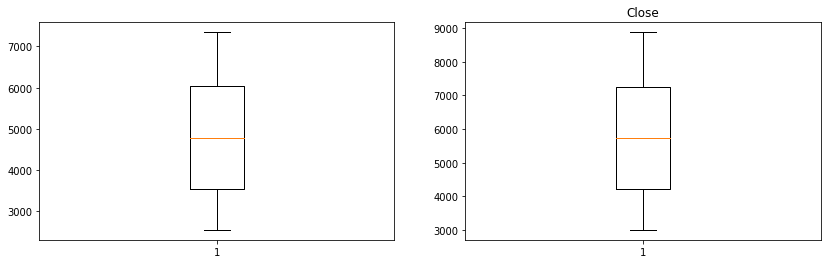

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.boxplot(df['Close'])
ax2.boxplot(trans_data_close)
plt.show()

In [42]:
df_transformed = df.copy()

df_transformed['Open'] = trans_data_open
df_transformed['High'] = trans_data_high
df_transformed['Low'] = trans_data_low
df_transformed['Volume'] = trans_data_volume
df_transformed['Adj Close'] = trans_data_adj
df_transformed['Close'] = trans_data_close

df_transformed = df_transformed.reset_index(drop=True)
df_transformed

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2635.624828,3203.513083,2796.296634,3120.082798,1319.654943,563.097955
1,2016-01-05,2640.626186,3234.104557,2807.023564,3156.321596,1333.261545,629.235342
2,2016-01-06,2665.632979,3221.867099,2807.023564,3114.043953,1317.386228,657.327926
3,2016-01-07,2620.620757,3136.237538,2764.118031,3065.743090,1299.218936,776.499845
4,2016-01-08,2590.612624,3124.009458,2753.392563,3065.743090,1299.218936,718.678305
...,...,...,...,...,...,...,...
1999,2021-06-25,6231.661702,7631.870000,6631.670654,7451.782705,3079.278207,530.946188
2000,2021-06-26,6188.315324,7586.030711,6583.032482,7396.318541,3058.915790,550.596322
2001,2021-06-27,6144.968957,7540.198320,6534.397483,7340.864105,3038.539822,569.575490
2002,2021-06-28,6101.622600,7494.372868,6485.765679,7285.419468,3018.150194,587.948189


### Analisis Univariat Lanjutan & Pendeteksian Anomali

Pada bagian ini, akan dilakukan analisis tren setiap variabel terhadap variabel ‘Date’ sekaligus melakukan penanganan outliers (anomali) lanjutan, yaitu dengan mempertimbangkan karakteristik sekuensial time-series yang dimiliki oleh setiap variabel pada data.

### 1) Open

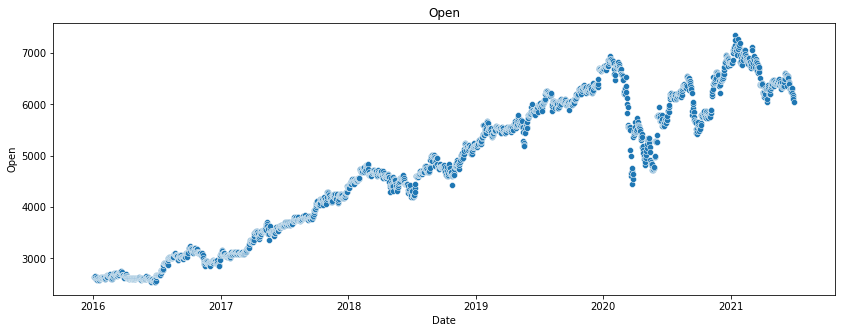

In [43]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Open')
sns.scatterplot(x=df['Date'], y=df['Open'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [44]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [45]:
adfullertest(df['Open'])

ADF Statistics: -1.3273703363391613
p-Value: 0.616559203746269
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

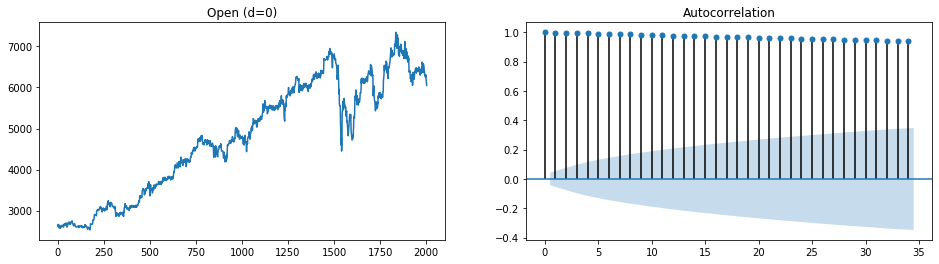

In [47]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'])
ax1.set_title('Open (d=0)')
plot_acf(df['Open'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

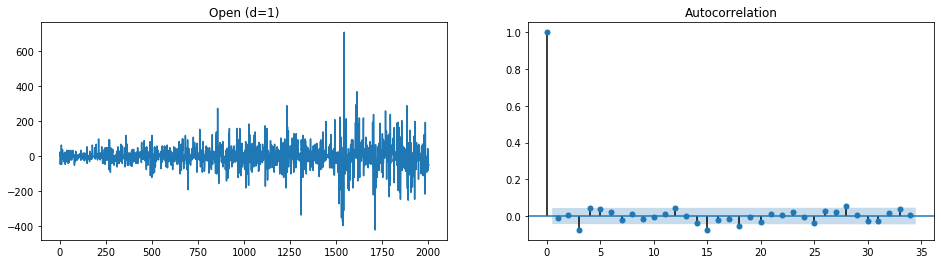

In [48]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

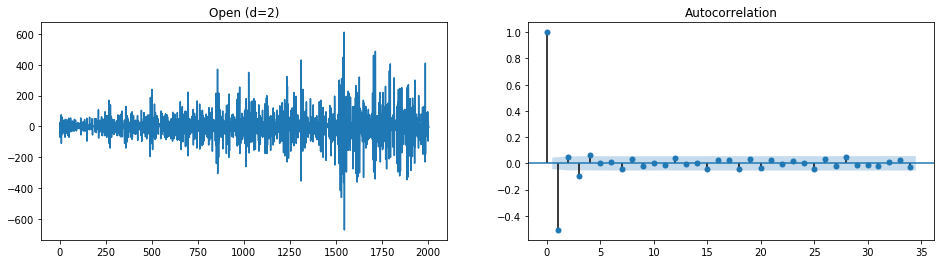

In [49]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().diff().dropna())
ax1.set_title('Open (d=2)')
plot_acf(df['Open'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [50]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Open'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

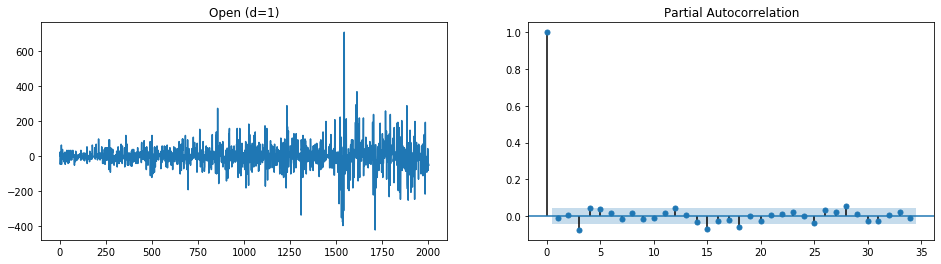

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_pacf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 3.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

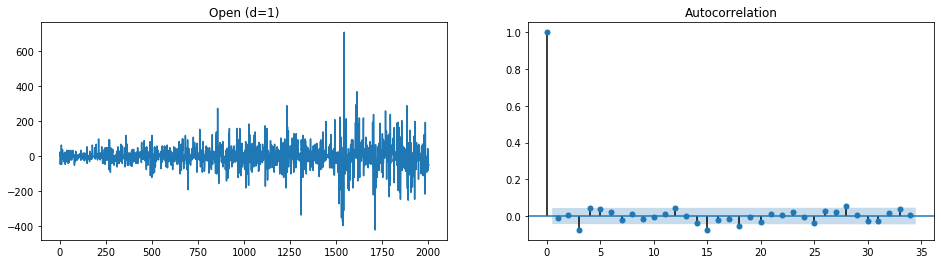

In [52]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,1,3)

In [53]:
model = ARIMA(df['Open'], order=(3,1,3))
result = model.fit()

In [54]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2004
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -11058.211
Date:                Sat, 11 Dec 2021   AIC                          22130.422
Time:                        23:23:05   BIC                          22169.638
Sample:                             0   HQIC                         22144.820
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8063      0.131     -6.154      0.000      -1.063      -0.550
ar.L2         -0.8460      0.116     -7.298      0.000      -1.073      -0.619
ar.L3         -0.6089      0.125     -4.870      0.0

### Model Fitting

In [55]:
df_dummy = df.copy()

In [56]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Open'] - df_dummy['forecast']

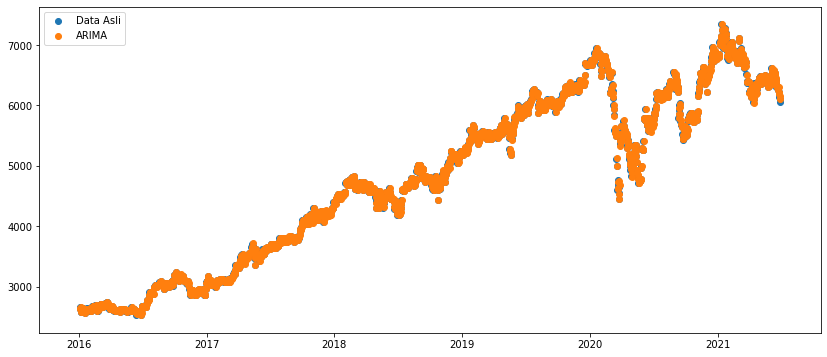

In [57]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

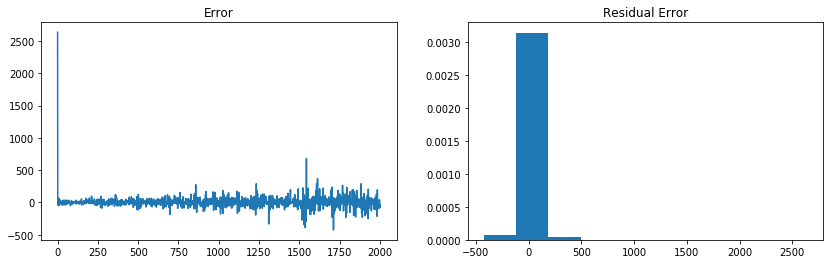

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [59]:
result.resid.skew()

15.299553597617312

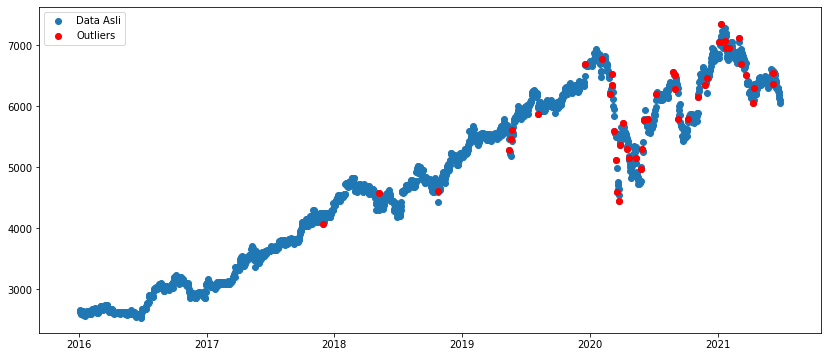

In [60]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

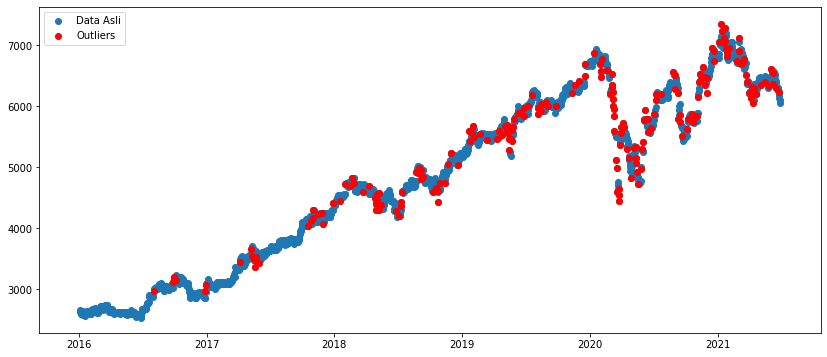

In [61]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


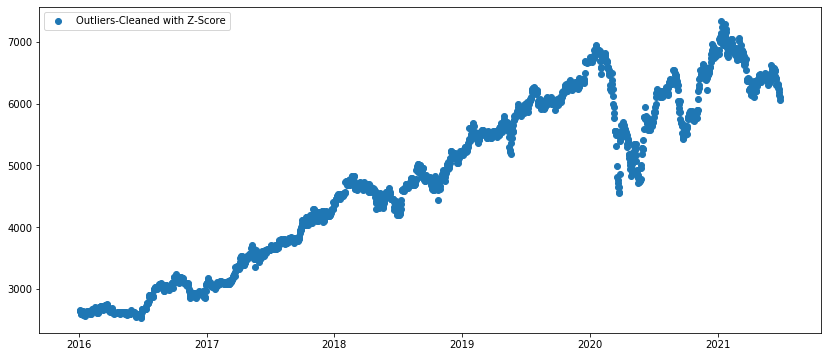

In [62]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
df_dummy_z = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Open'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


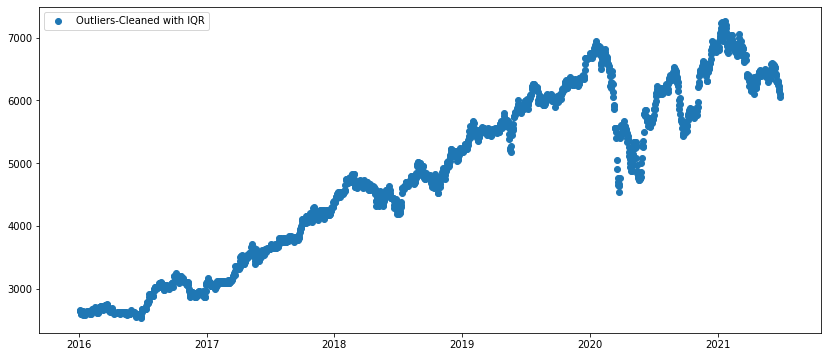

In [63]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
df_dummy_iqr = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Open'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

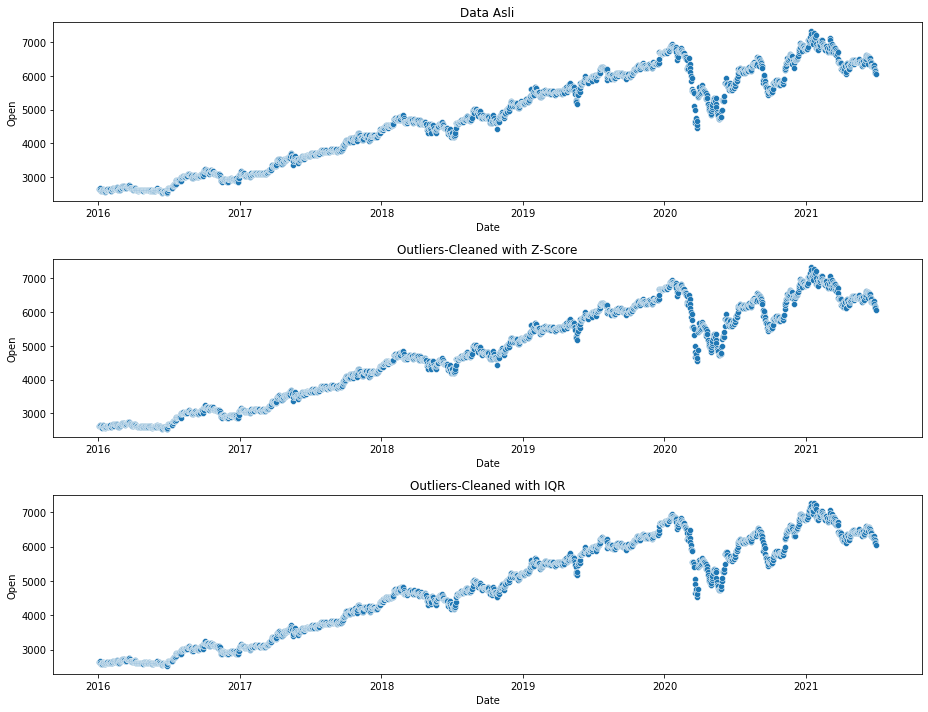

In [64]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Open'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Open'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Open'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 2) High

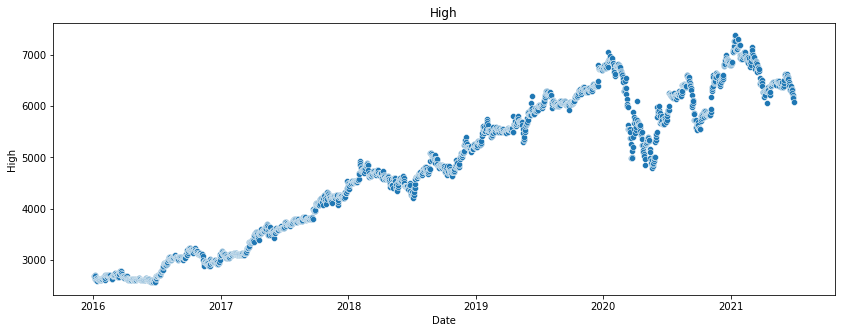

In [65]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('High')
sns.scatterplot(x=df['Date'], y=df['High'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [66]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [67]:
adfullertest(df['High'])

ADF Statistics: -1.3753026819988772
p-Value: 0.594057395055976
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

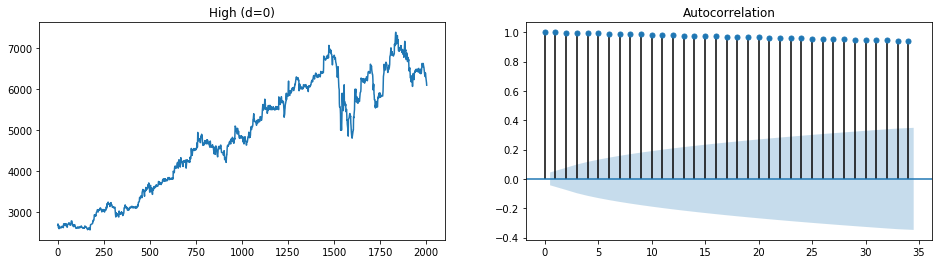

In [69]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'])
ax1.set_title('High (d=0)')
plot_acf(df['High'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

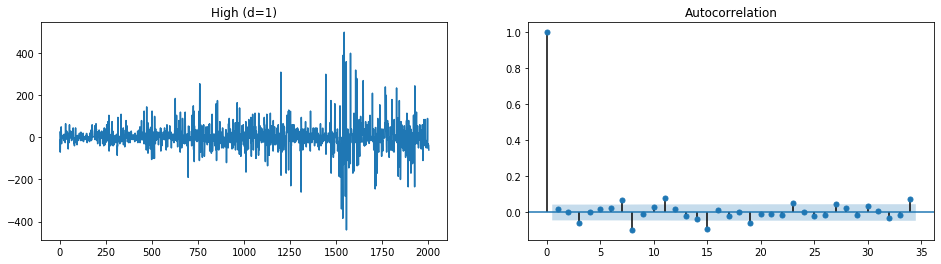

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

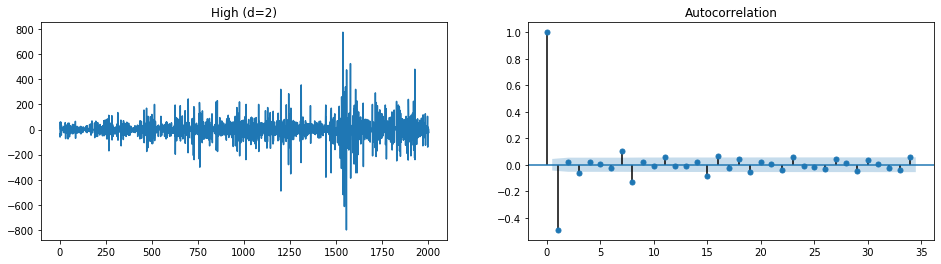

In [71]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().diff().dropna())
ax1.set_title('High (d=2)')
plot_acf(df['High'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [72]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['High'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

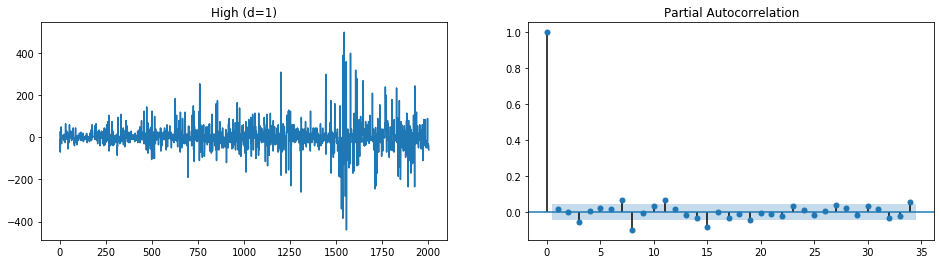

In [73]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_pacf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 3.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

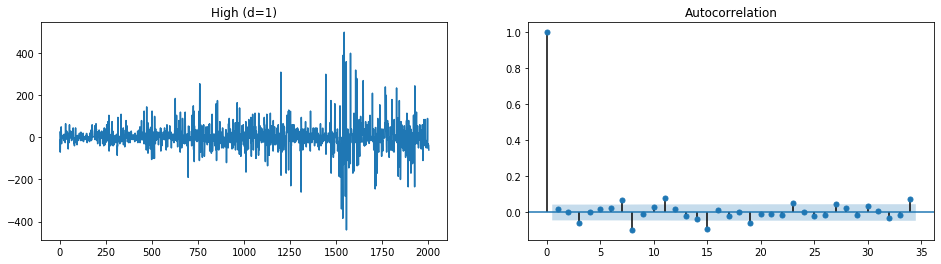

In [74]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,1,3)

In [75]:
model = ARIMA(df['High'], order=(3,1,3))
result = model.fit()

In [76]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2004
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -10842.419
Date:                Sat, 11 Dec 2021   AIC                          21698.839
Time:                        23:23:14   BIC                          21738.056
Sample:                             0   HQIC                         21713.237
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2972      0.511      0.582      0.561      -0.704       1.298
ar.L2         -0.4354      0.453     -0.961      0.336      -1.323       0.452
ar.L3         -0.5499      0.486     -1.131      0.2

### Model Fitting

In [77]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['High'] - df_dummy['forecast']

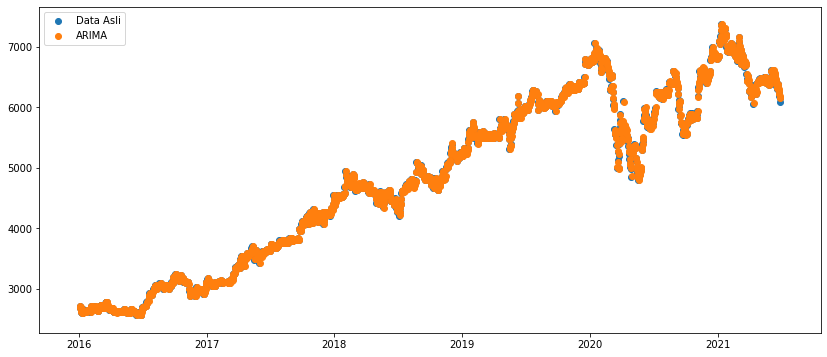

In [78]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

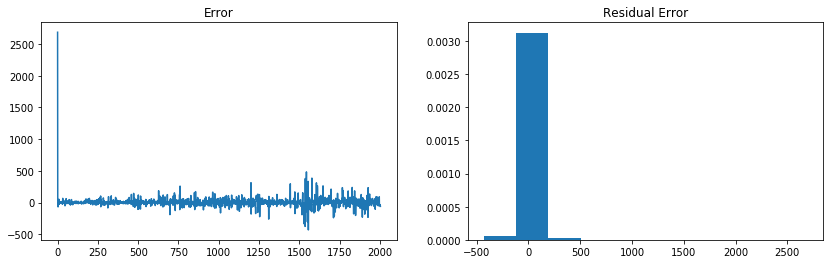

In [79]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [80]:
result.resid.skew()

18.374439942202418

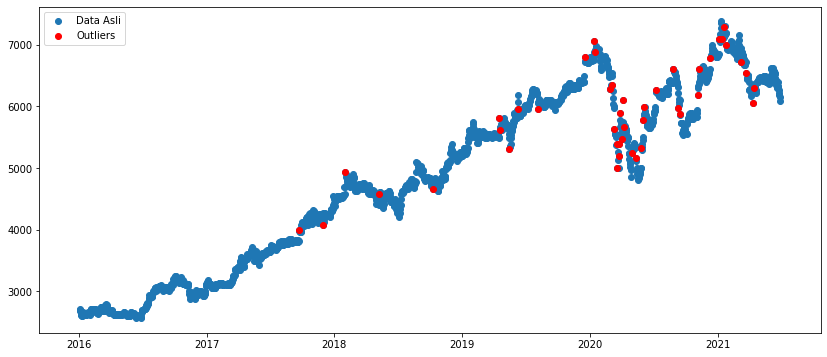

In [81]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

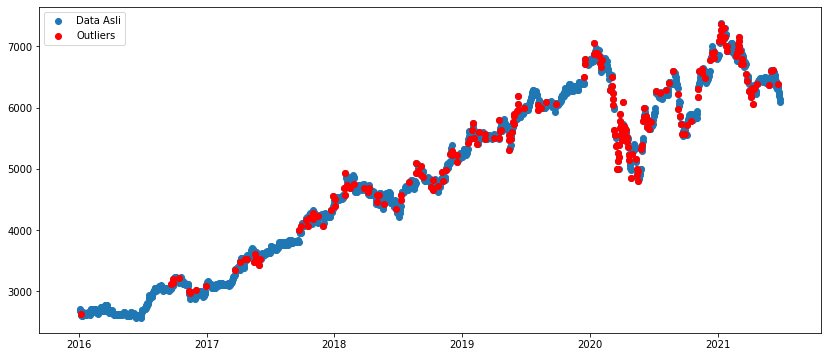

In [82]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


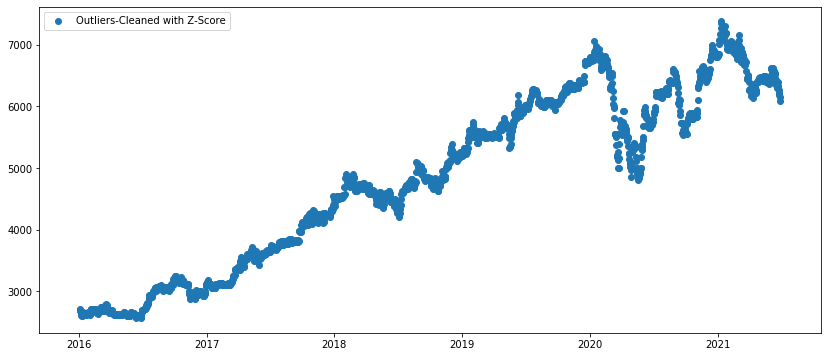

In [83]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['High'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


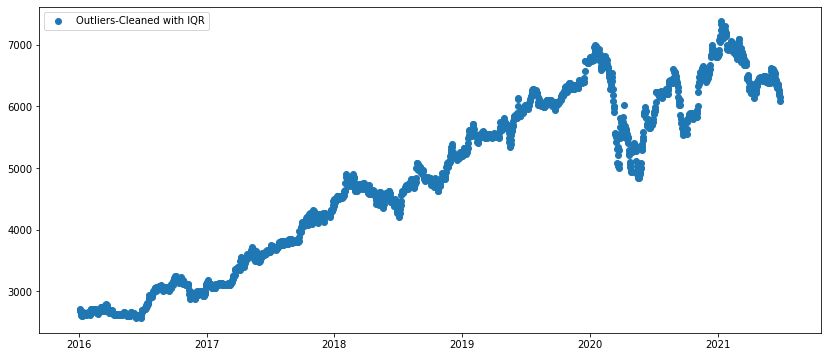

In [84]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['High'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

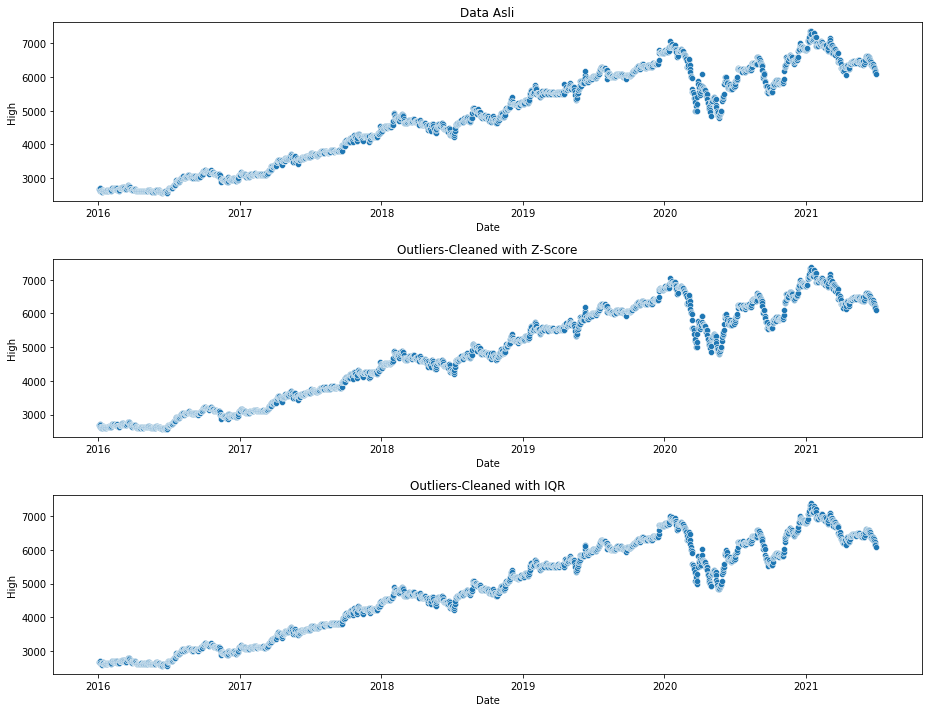

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['High'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['High'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['High'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 3) Low

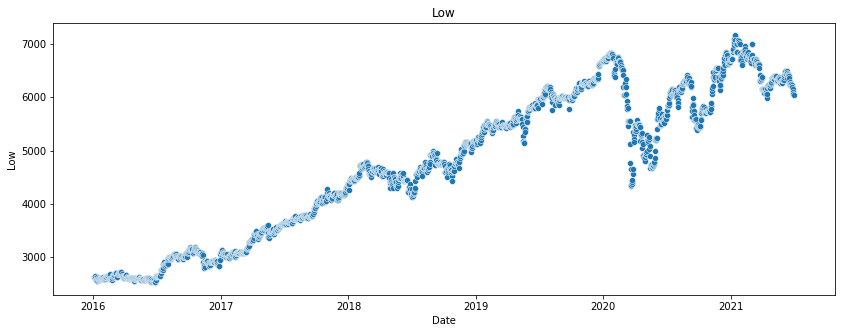

In [86]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Low')
sns.scatterplot(x=df['Date'], y=df['Low'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [87]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [88]:
adfullertest(df['Low'])

ADF Statistics: -1.3301449488190367
p-Value: 0.6152706345443246
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [89]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

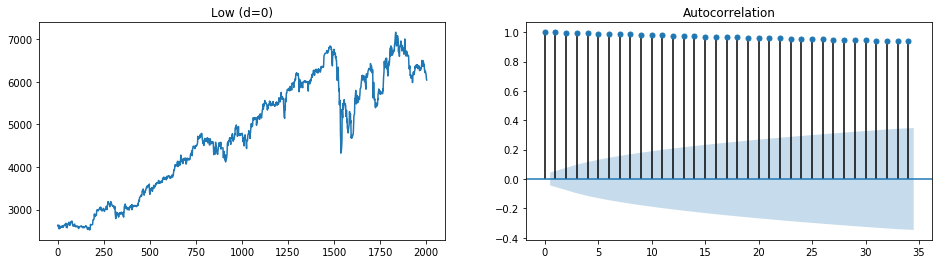

In [90]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'])
ax1.set_title('Low (d=0)')
plot_acf(df['Low'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

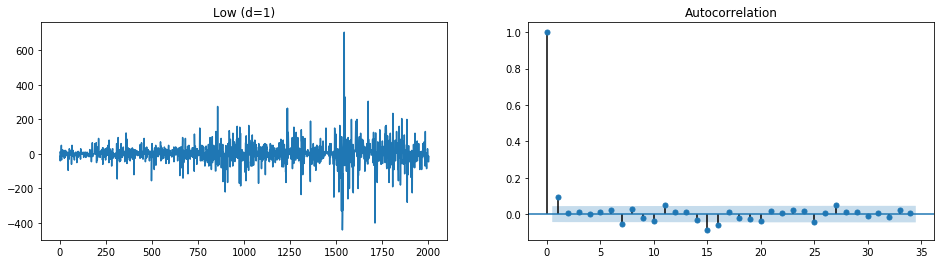

In [91]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

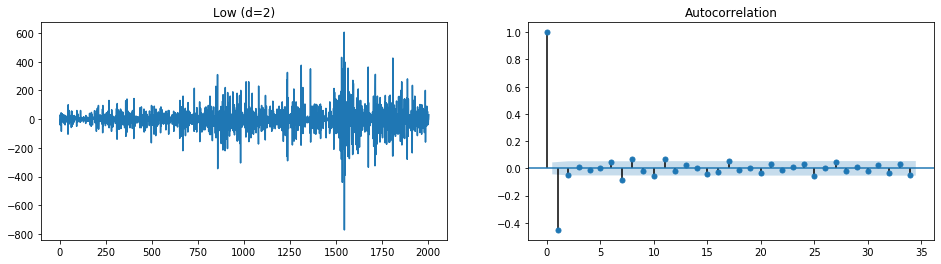

In [92]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().diff().dropna())
ax1.set_title('Low (d=2)')
plot_acf(df['Low'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [93]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Low'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

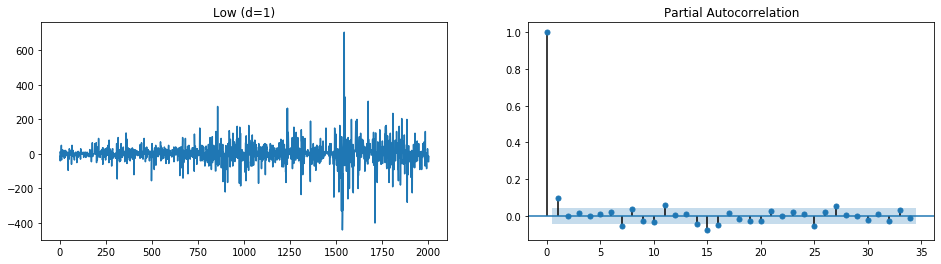

In [94]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_pacf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

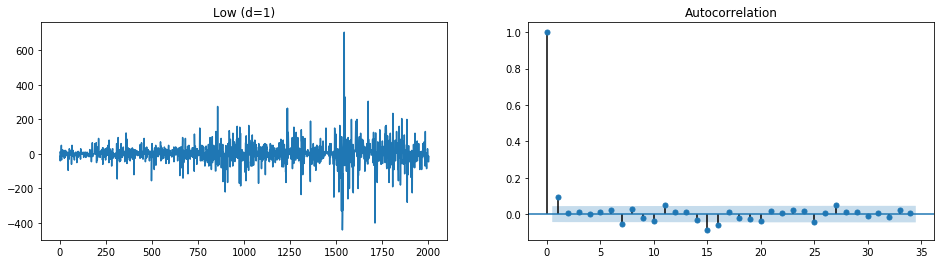

In [95]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,1)

In [96]:
model = ARIMA(df['Low'], order=(1,1,1))
result = model.fit()

In [97]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 2004
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10862.413
Date:                Sat, 11 Dec 2021   AIC                          21730.826
Time:                        23:23:20   BIC                          21747.633
Sample:                             0   HQIC                         21736.997
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0970      0.151      0.641      0.521      -0.200       0.394
ma.L1         -0.0017      0.154     -0.011      0.991      -0.303       0.300
sigma2      3010.8341     28.765    104.668      0.0

### Model Fitting

In [98]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Low'] - df_dummy['forecast']

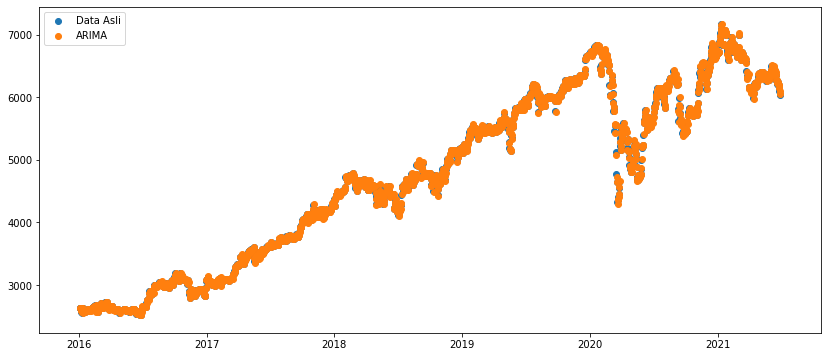

In [99]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

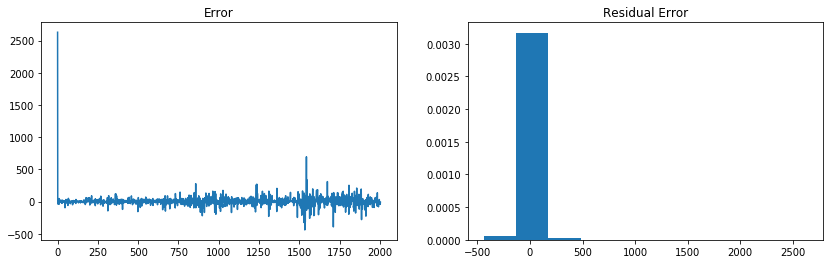

In [100]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [101]:
result.resid.skew()

17.571812311507056

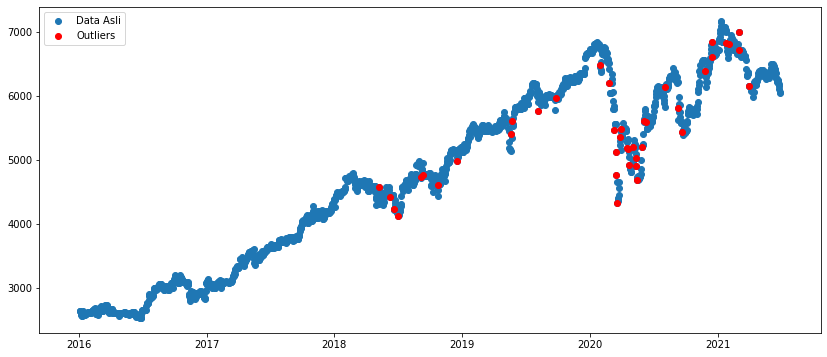

In [102]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

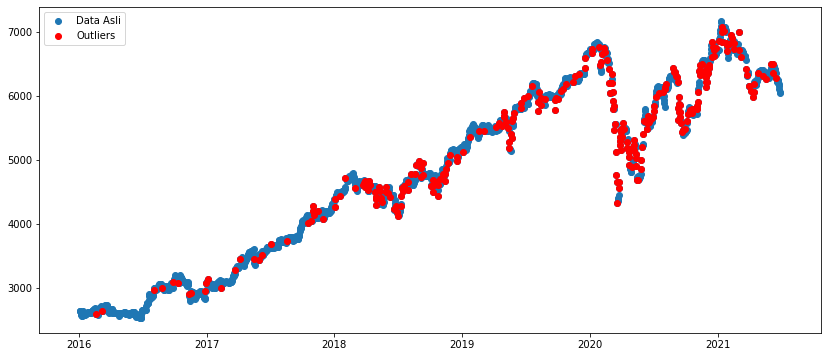

In [103]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


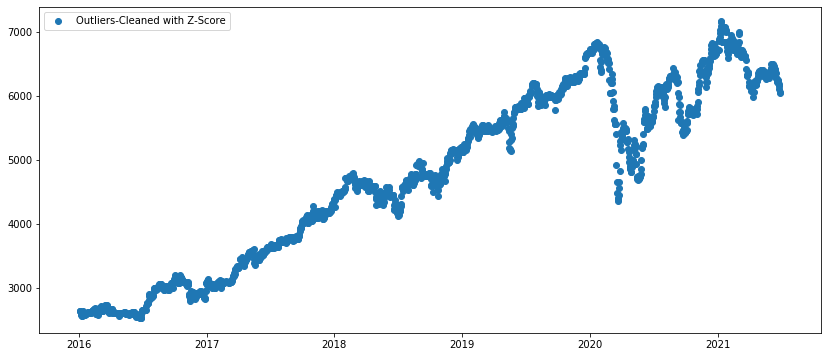

In [104]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Low'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


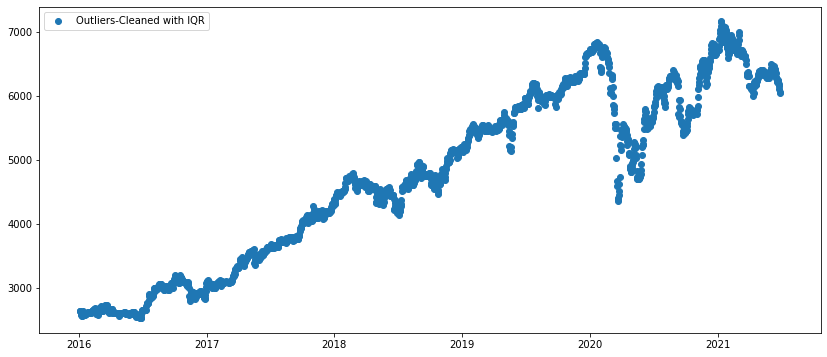

In [105]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Low'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

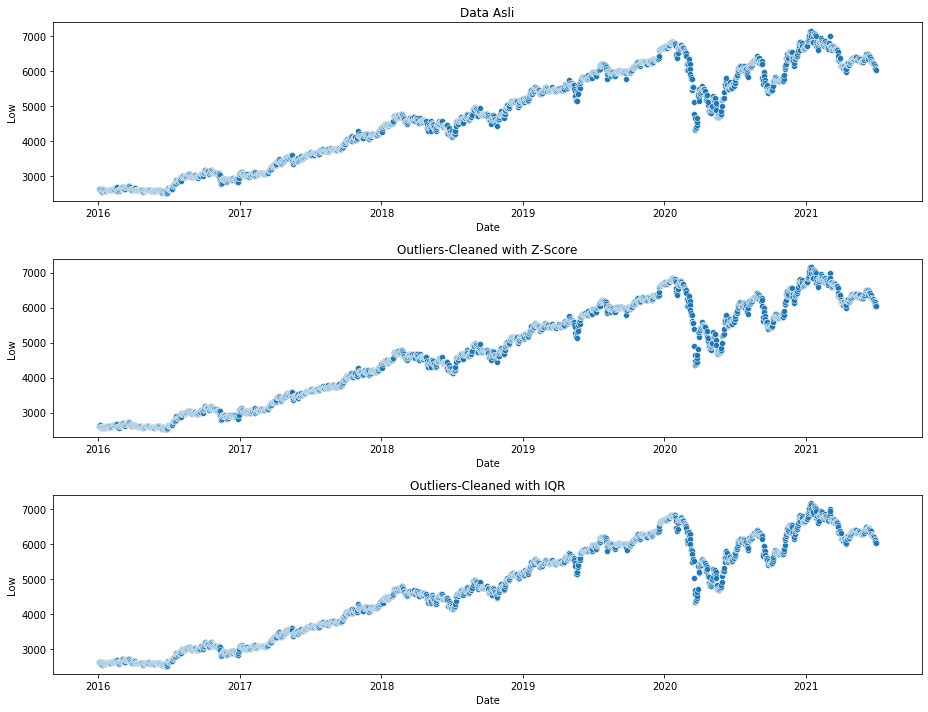

In [106]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Low'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Low'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Low'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 4) Volume

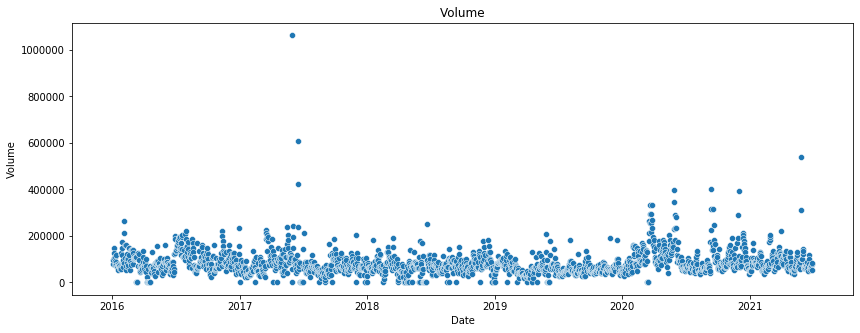

In [107]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Volume')
sns.scatterplot(x=df['Date'], y=df['Volume'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [108]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [109]:
adfullertest(df['Volume'])

ADF Statistics: -6.432080070211409
p-Value: 1.687663803849651e-08
Stationary


Hasil ADF Test menunjukkan p-value < 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data sudah bersifat stasioner. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [110]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Volume'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 0


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

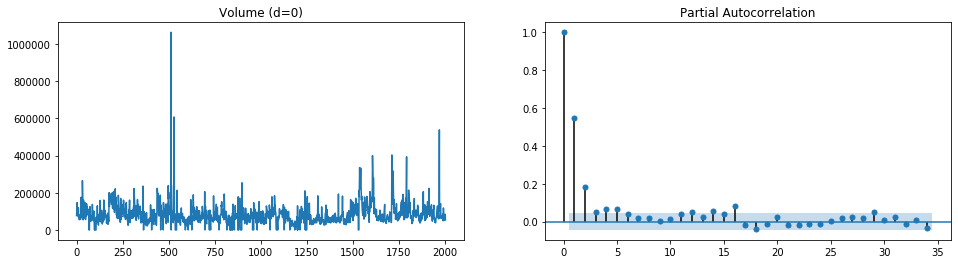

In [111]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_pacf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 5.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

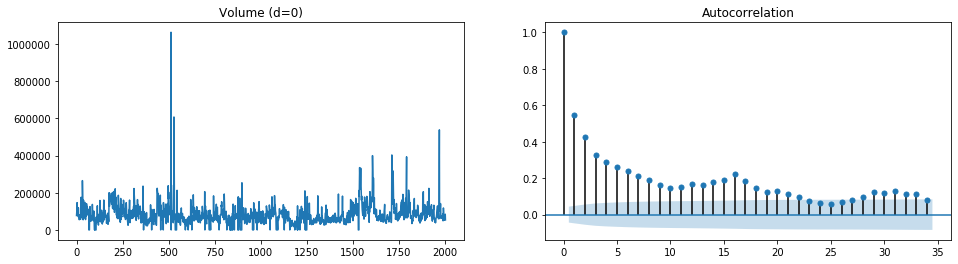

In [112]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_acf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(5,0,3)

In [113]:
model = ARIMA(df['Volume'], order=(5,0,3))
result = model.fit()

In [114]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 2004
Model:                 ARIMA(5, 0, 3)   Log Likelihood              -24312.812
Date:                Sat, 11 Dec 2021   AIC                          48645.623
Time:                        23:23:27   BIC                          48701.652
Sample:                             0   HQIC                         48666.194
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.297e+04   6303.578     13.162      0.000    7.06e+04    9.53e+04
ar.L1          0.5509      0.649      0.849      0.396      -0.721       1.822
ar.L2          0.1260      0.611      0.206      0.8

### Model Fitting

In [115]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Volume'] - df_dummy['forecast']

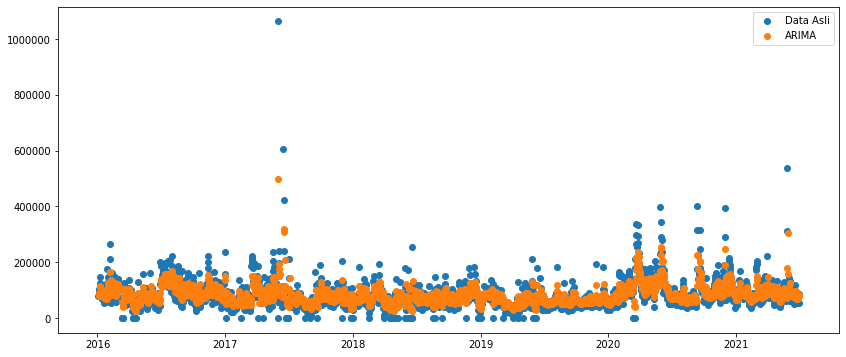

In [116]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

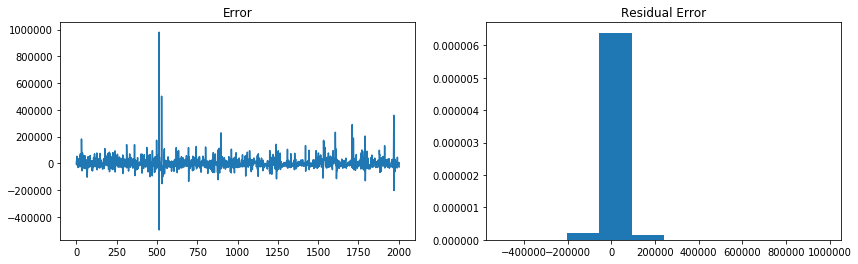

In [117]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [118]:
result.resid.skew()

6.143451118769557

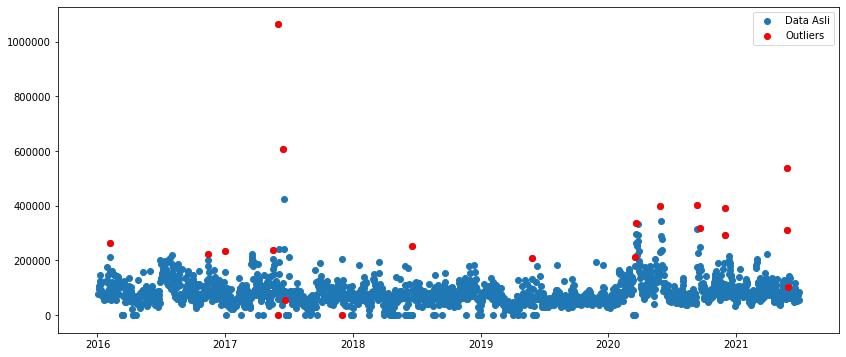

In [119]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

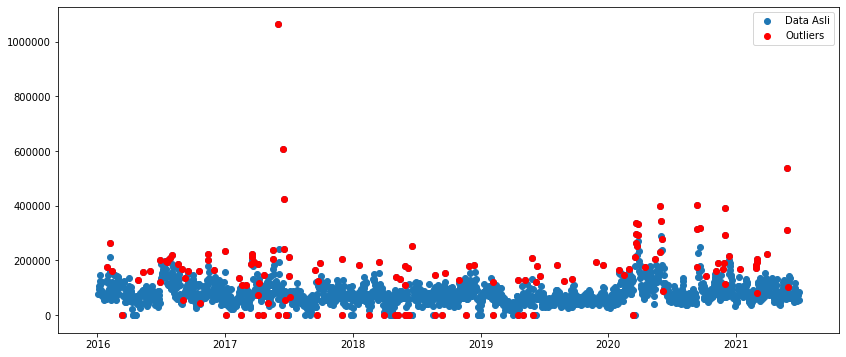

In [120]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


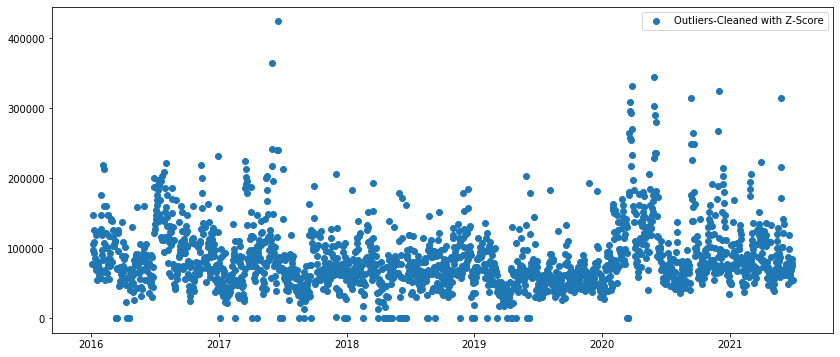

In [121]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Volume'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


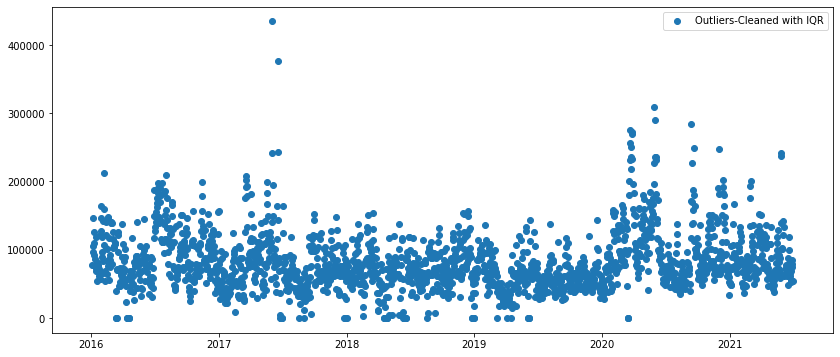

In [122]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

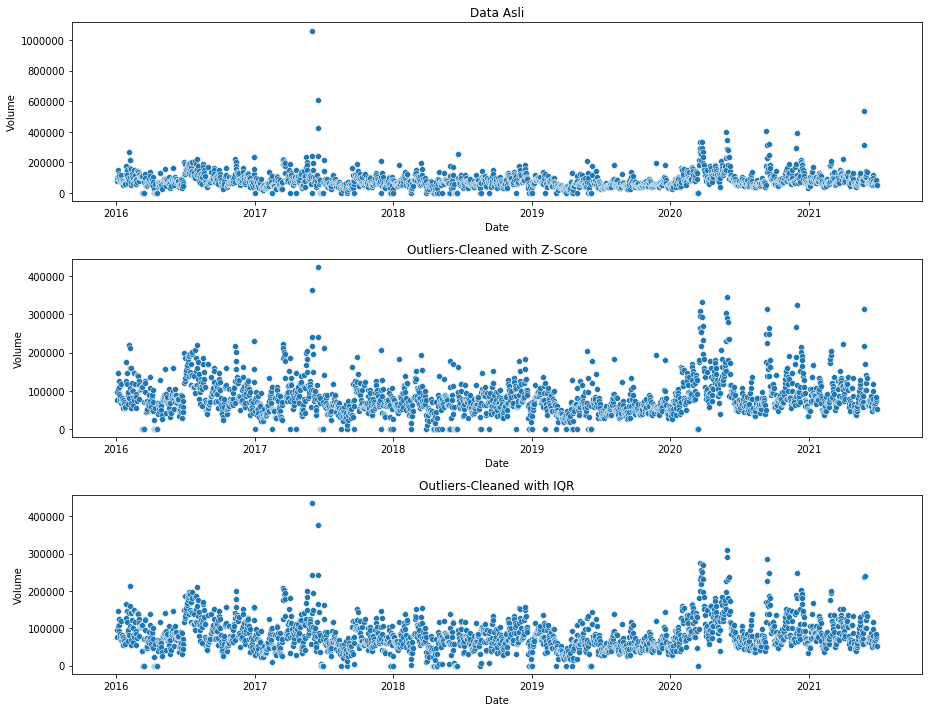

In [123]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Volume'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Volume'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 5) Adj Close

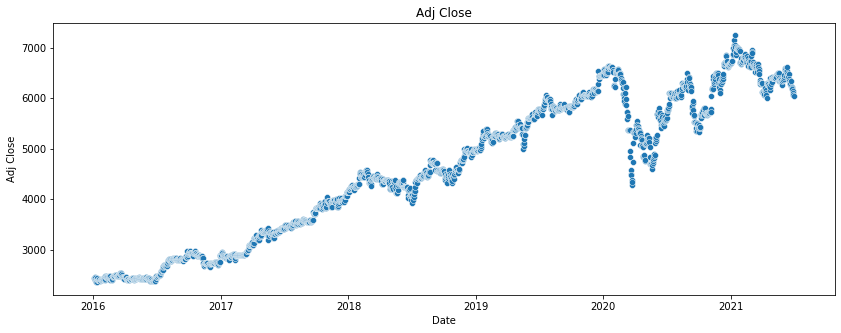

In [124]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Adj Close')
sns.scatterplot(x=df['Date'], y=df['Adj Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [125]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [126]:
adfullertest(df['Adj Close'])

ADF Statistics: -1.2201997876056665
p-Value: 0.6648464768528417
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [127]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

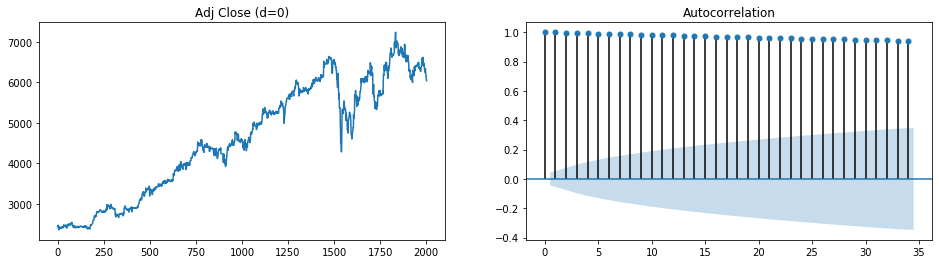

In [128]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'])
ax1.set_title('Adj Close (d=0)')
plot_acf(df['Adj Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

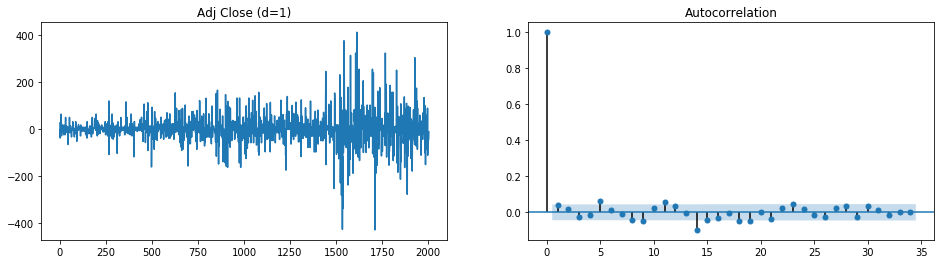

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

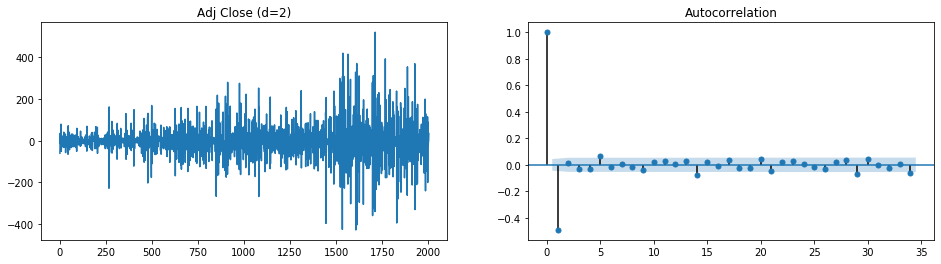

In [130]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().diff().dropna())
ax1.set_title('Adj Close (d=2)')
plot_acf(df['Adj Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [131]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Adj Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

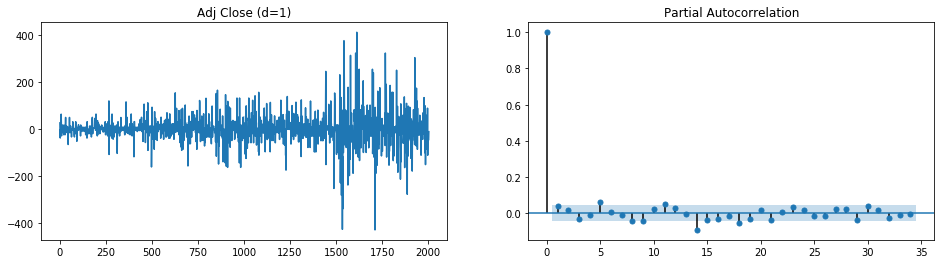

In [132]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_pacf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

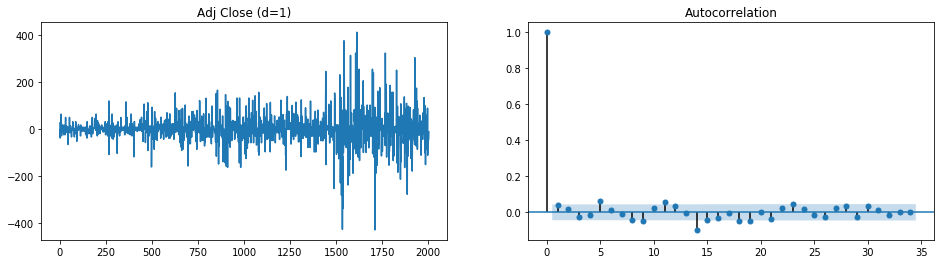

In [133]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,1,1)

In [134]:
model = ARIMA(df['Adj Close'], order=(5,1,1))
result = model.fit()

In [135]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2004
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -10861.245
Date:                Sat, 11 Dec 2021   AIC                          21736.491
Time:                        23:23:34   BIC                          21775.708
Sample:                             0   HQIC                         21750.889
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1304      0.176      0.740      0.459      -0.215       0.476
ar.L2          0.0199      0.017      1.205      0.228      -0.012       0.052
ar.L3         -0.0307      0.021     -1.464      0.1

### Model Fitting

In [136]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Adj Close'] - df_dummy['forecast']

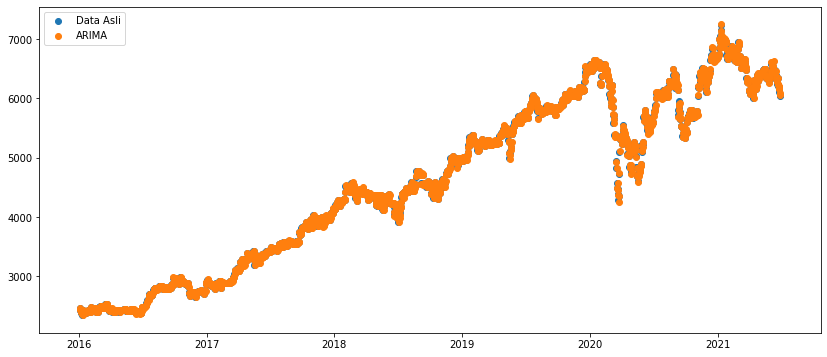

In [137]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

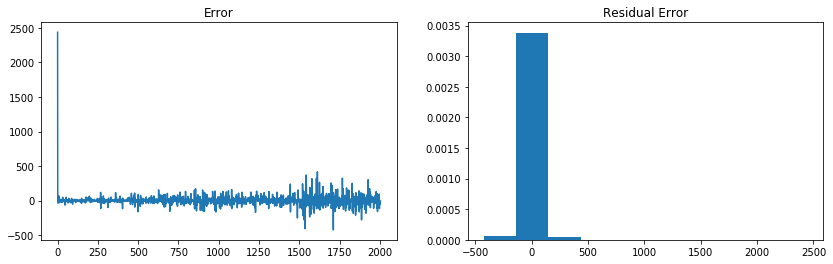

In [138]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [139]:
result.resid.skew()

15.771634095161637

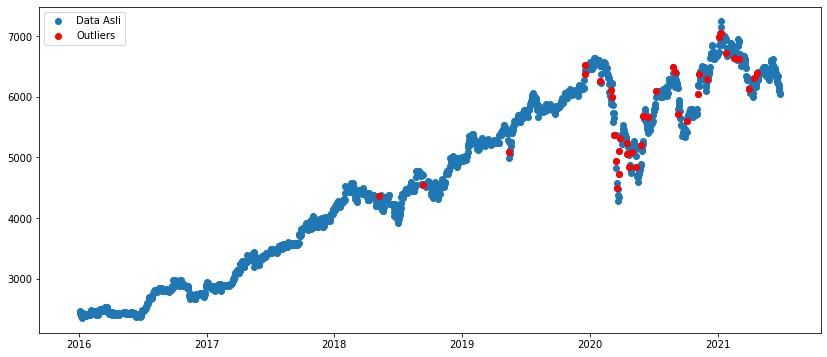

In [140]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

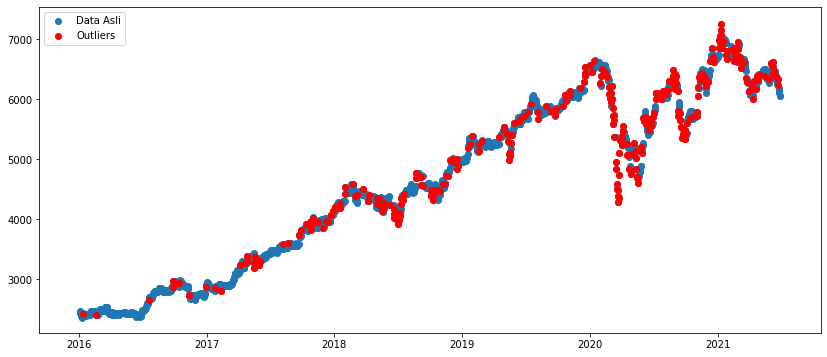

In [141]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


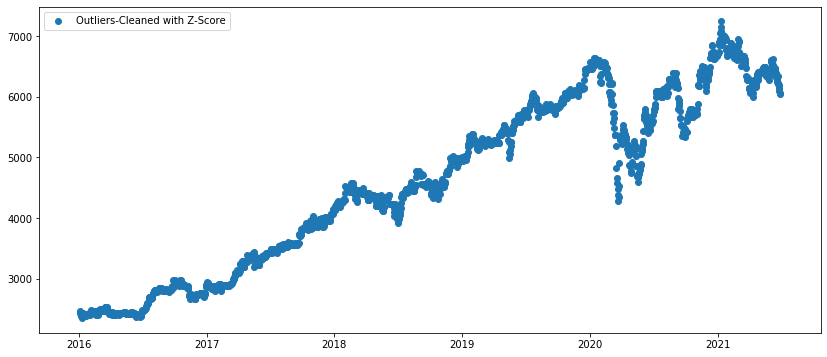

In [142]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Adj Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


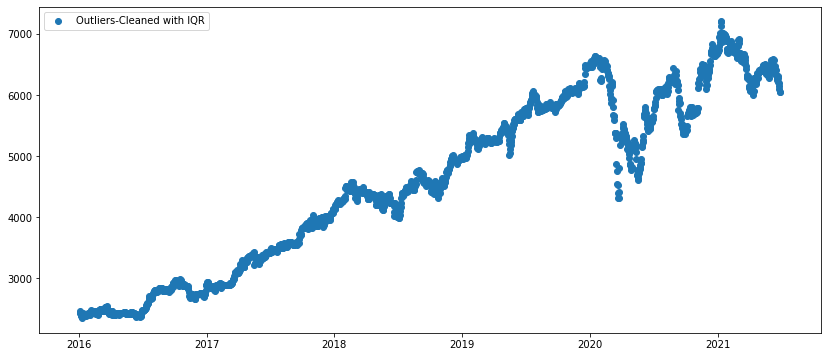

In [143]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

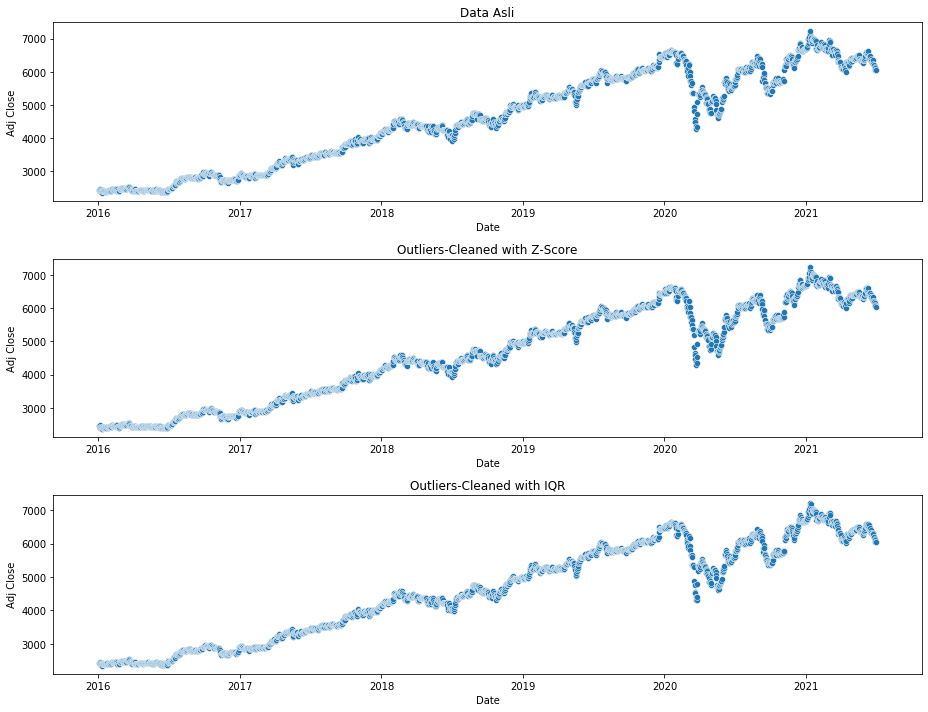

In [144]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Adj Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Adj Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 6) Close

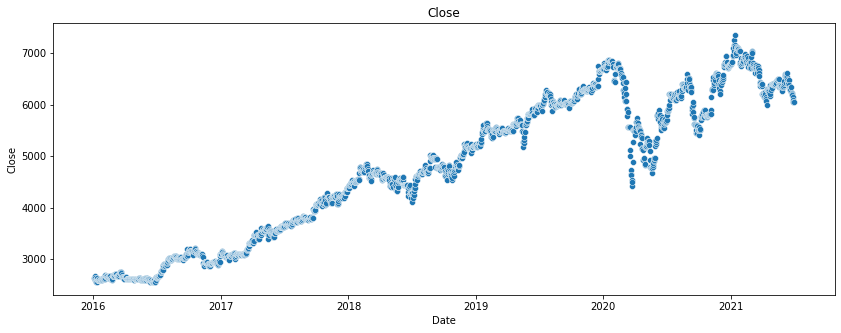

In [145]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Close')
sns.scatterplot(x=df['Date'], y=df['Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [146]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [147]:
adfullertest(df['Close'])

ADF Statistics: -1.3379776794434695
p-Value: 0.6116234309182127
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [148]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

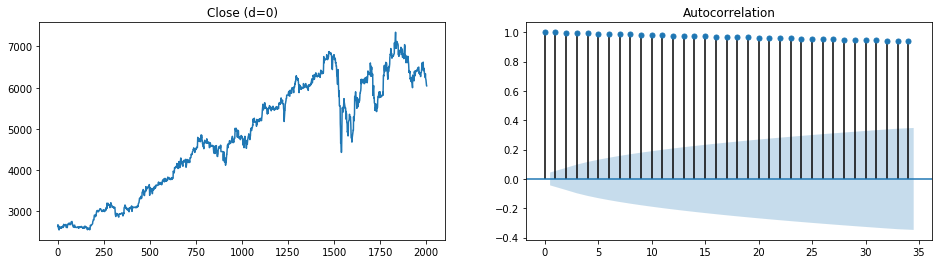

In [149]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'])
ax1.set_title('Close (d=0)')
plot_acf(df['Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

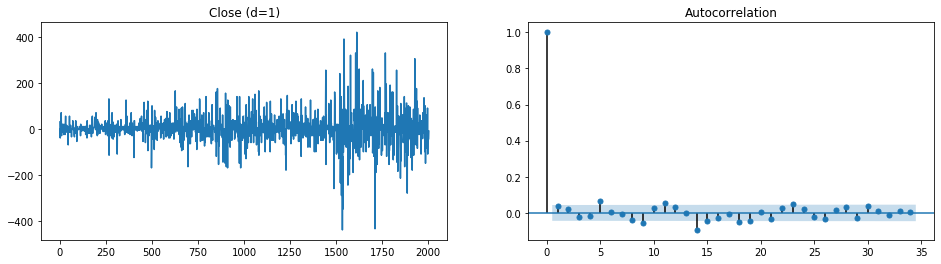

In [150]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

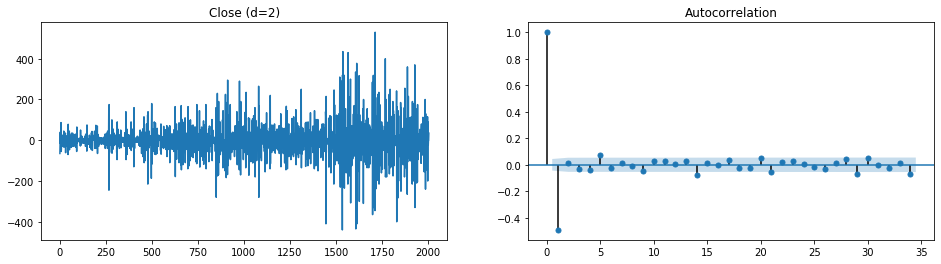

In [151]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().diff().dropna())
ax1.set_title('Close (d=2)')
plot_acf(df['Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [152]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

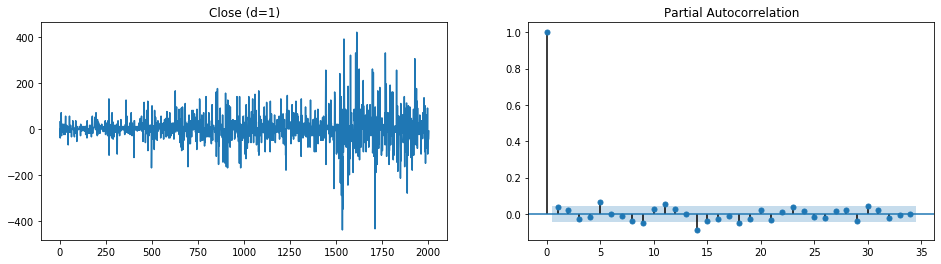

In [153]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_pacf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 5.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

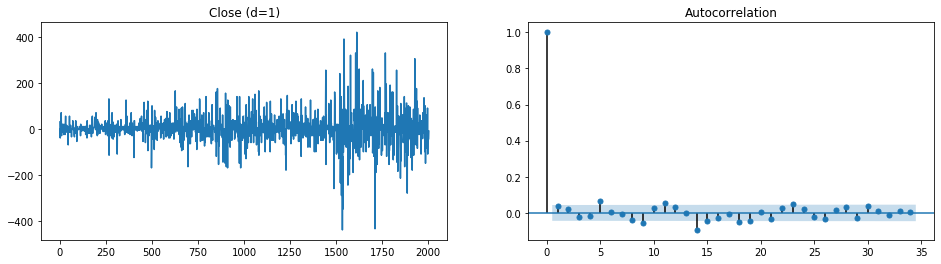

In [154]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(5,1,1)

In [155]:
model = ARIMA(df['Close'], order=(5,1,1))
result = model.fit()

In [156]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2004
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -10927.923
Date:                Sat, 11 Dec 2021   AIC                          21869.846
Time:                        23:23:41   BIC                          21909.063
Sample:                             0   HQIC                         21884.245
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0681      0.174      0.391      0.696      -0.274       0.410
ar.L2          0.0229      0.016      1.424      0.154      -0.009       0.054
ar.L3         -0.0268      0.021     -1.302      0.1

### Model Fitting

In [157]:
df_dummy['forecast'] = result.predict(start=1, end=2004, typ='levels')
df_dummy['Error'] = df_dummy['Close'] - df_dummy['forecast']

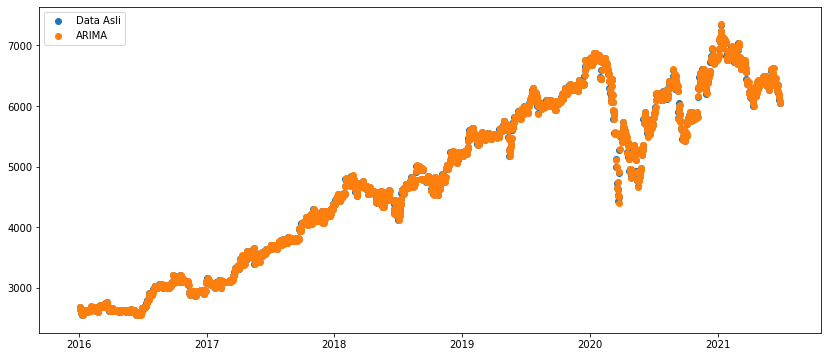

In [158]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

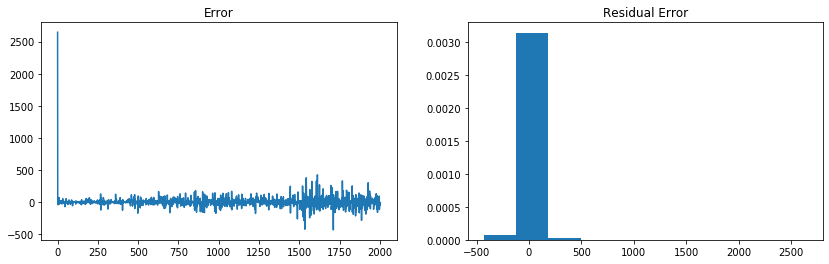

In [159]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [160]:
result.resid.skew()

16.906298968437238

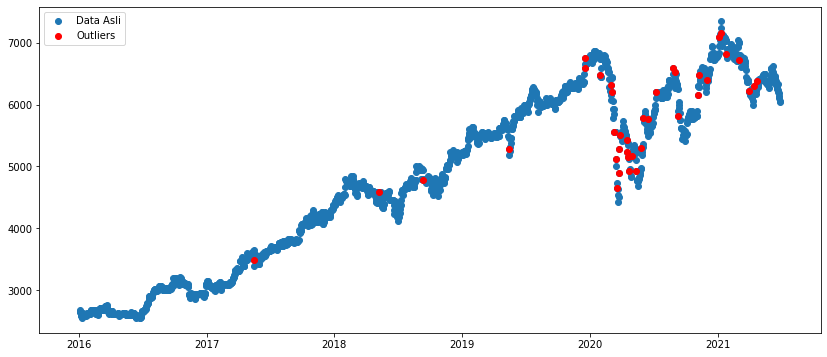

In [161]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

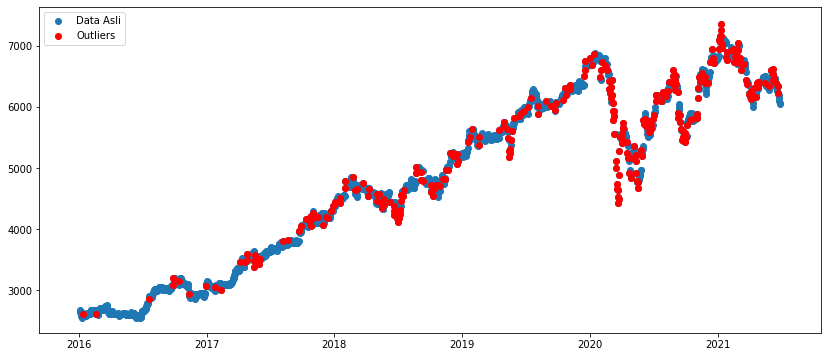

In [162]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


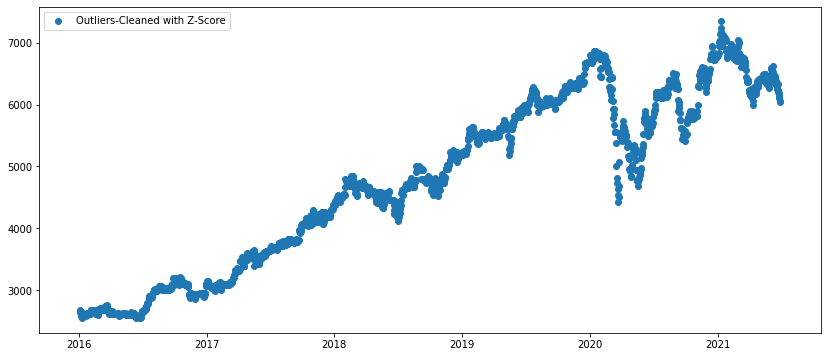

In [163]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


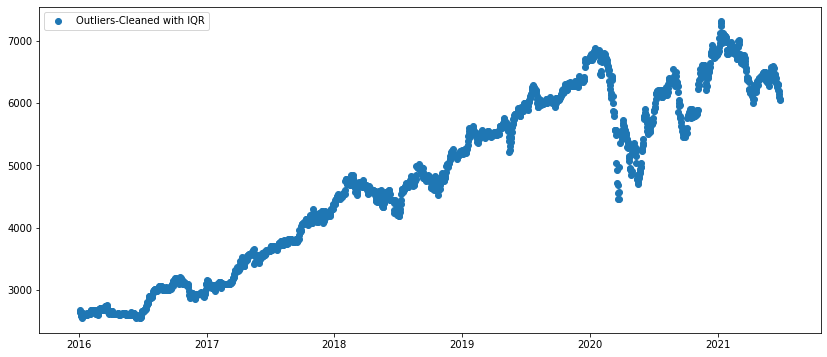

In [164]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

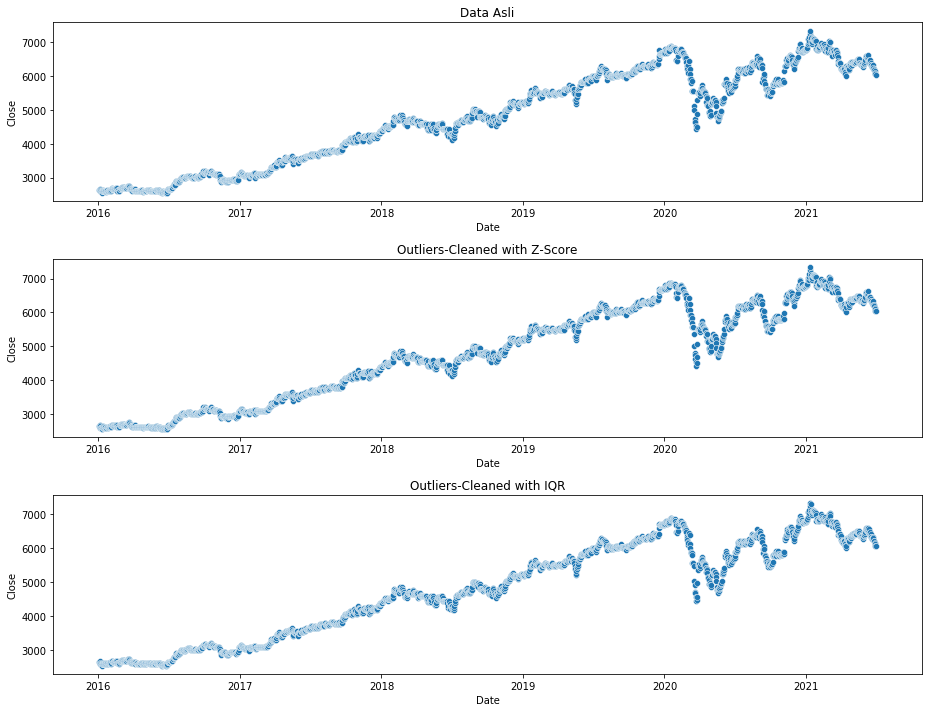

In [165]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### Saving Preprocessed Data

In [166]:
data = df.copy()

#### Opsi Data I

In [167]:
# Menggunakan Analisis Outliers dengan IQR untuk Error Time Series
data['Open'] = df_dummy_iqr['Open']
data['High'] = df_dummy_iqr['High']
data['Low'] = df_dummy_iqr['Low']
data['Volume'] = df_dummy_iqr['Volume']
data['Adj Close'] = df_dummy_iqr['Adj Close']
data['Close'] = df_dummy_iqr['Close']
data = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
data

,Date,Open,High,Low,Volume,Adj Close,Close
0,2016-01-04,2635.000000,2685.000000,2630.0,77480.000000,2438.056,2645.0
1,2016-01-05,2640.000000,2710.000000,2640.0,96609.000000,2465.709,2675.0
2,2016-01-06,2665.000000,2700.000000,2640.0,105370.000000,2433.448,2640.0
3,2016-01-07,2620.000000,2632.664922,2600.0,146747.000000,2396.577,2600.0
4,2016-01-08,2590.000000,2620.000000,2590.0,125820.000000,2396.577,2600.0
...,...,...,...,...,...,...,...
1999,2021-06-25,6230.742584,6260.000000,6190.0,68940.000000,6190.000,6190.0
2000,2021-06-26,6186.666667,6223.333333,6145.0,74100.333333,6145.000,6145.0
2001,2021-06-27,6143.333333,6186.666667,6100.0,79260.666667,6100.000,6100.0
2002,2021-06-28,6100.000000,6150.000000,6055.0,84421.000000,6055.000,6055.0


In [168]:
data.to_csv('BCA_Preprocessed_Data', index=False)